In [1]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score,  plot_roc_curve

In [2]:
train = pd.read_csv(r"C:\Users\archi\OneDrive\Desktop\Python Projects\Kaggle\Playground Series\Multiclass Obesity\playground-series-s4e2\train.csv")

In [3]:
train

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [4]:
d = {}
for x in [x for x in list(train.columns) if train[x].dtype == 'object']:
    d[x] = list(train[x].unique())
    
print(d)

{'Gender': ['Male', 'Female'], 'family_history_with_overweight': ['yes', 'no'], 'FAVC': ['yes', 'no'], 'CAEC': ['Sometimes', 'Frequently', 'no', 'Always'], 'SMOKE': ['no', 'yes'], 'SCC': ['no', 'yes'], 'CALC': ['Sometimes', 'no', 'Frequently'], 'MTRANS': ['Public_Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike'], 'NObeyesdad': ['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight', 'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_I']}


In [5]:
train['Gender'] = np.where(train['Gender'] == 'Male', 1, 0)
train['family_history_with_overweight'] = np.where(train['family_history_with_overweight'] == 'yes', 1, 0)
train['FAVC'] = np.where(train['FAVC'] == 'yes', 1, 0)
train['SMOKE'] = np.where(train['SMOKE'] == 'yes', 1, 0)
train['SCC'] = np.where(train['SCC'] == 'yes', 1, 0)

In [6]:
train['CALC'] = train['CALC'].map({'Sometimes':1, 'no':0, 'Frequently':2})
train['CAEC'] = train['CAEC'].map({'Sometimes':1, 'Frequently':2, 'no':0, 'Always':3})

In [7]:
dummy_vars = pd.get_dummies(train['MTRANS'])

# Concatenating the dummy variables with the original DataFrame
train = pd.concat([train, dummy_vars], axis=1)

In [8]:
train = train.drop(['MTRANS', 'id'], axis = 1)

In [9]:
train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1,0,...,0,0.000000,0.976473,1,Overweight_Level_II,0,0,0,1,0
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,0,...,0,1.000000,1.000000,0,Normal_Weight,1,0,0,0,0
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1,0,...,0,0.866045,1.673584,0,Insufficient_Weight,0,0,0,1,0
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1,0,...,0,1.467863,0.780199,1,Obesity_Type_III,0,0,0,1,0
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1,0,...,0,1.967973,0.931721,1,Overweight_Level_II,0,0,0,1,0


In [10]:
missing_values_count = train.isnull().sum()
print(missing_values_count)

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
NObeyesdad                        0
Automobile                        0
Bike                              0
Motorbike                         0
Public_Transportation             0
Walking                           0
dtype: int64


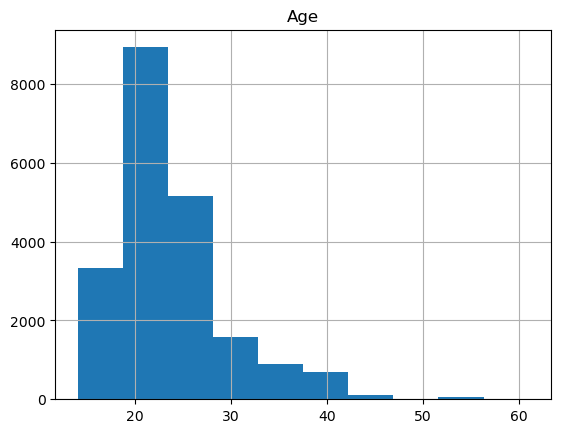

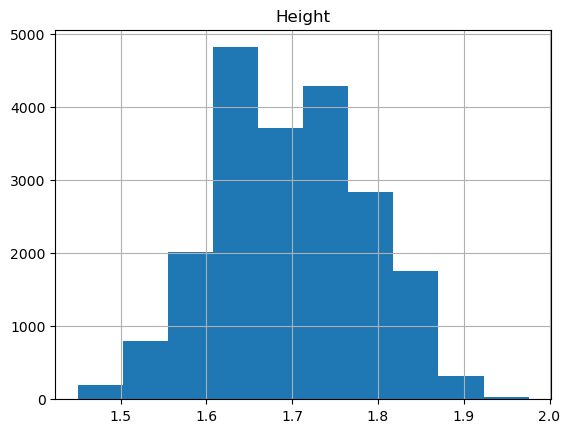

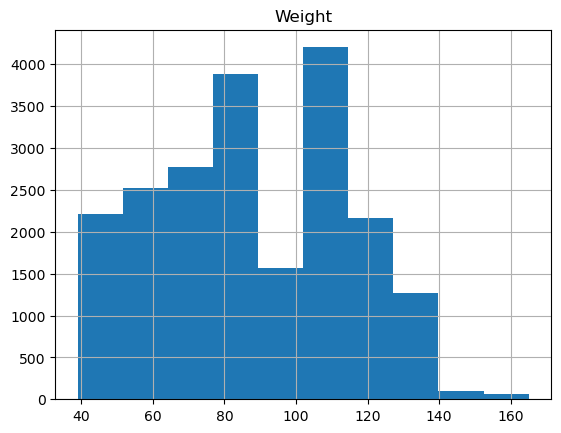

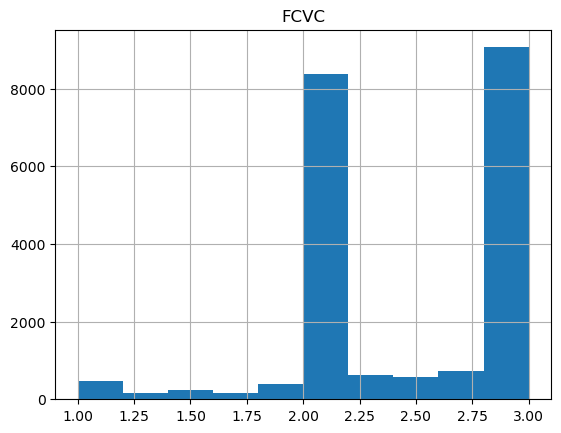

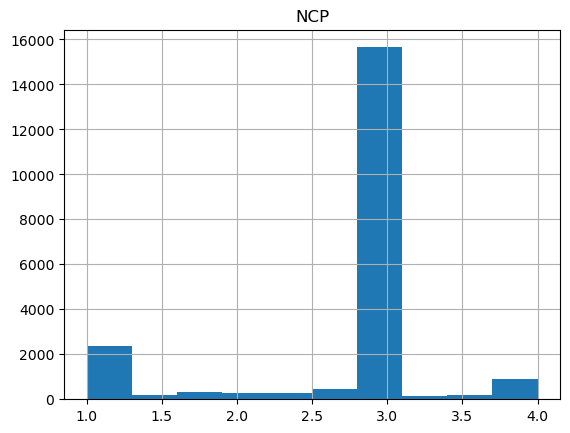

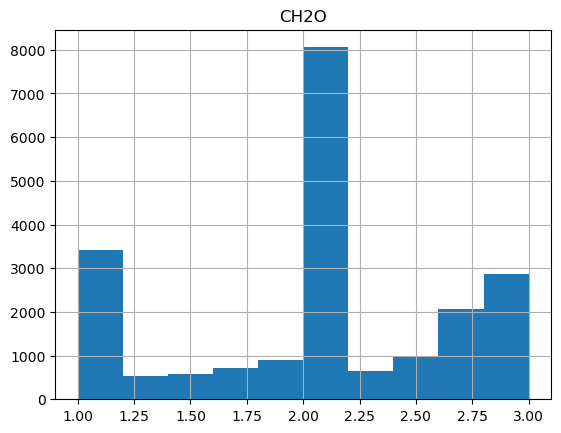

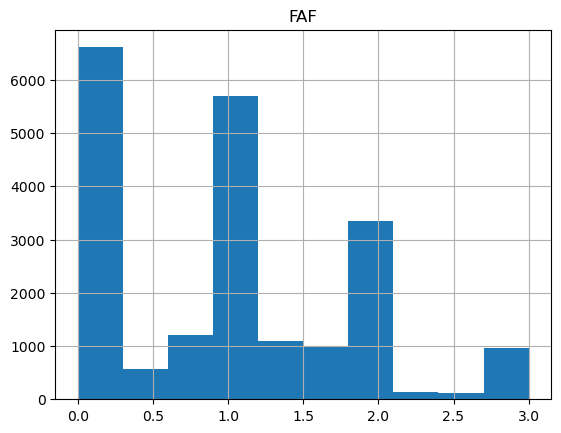

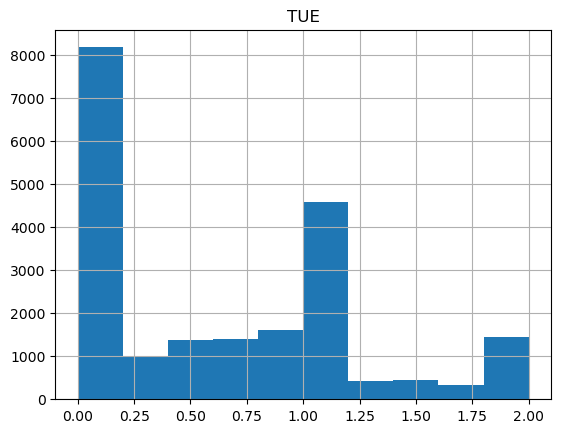

In [11]:
for x in [x for x in list(train.columns) if train[x].dtype == 'float64']:
    train[x].hist(bins = 10)
    plt.title(x)
    plt.show()

In [12]:
[x for x in list(train.columns) if train[x].dtype == 'float64']

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [13]:
train[ [x for x in list(train.columns) if train[x].dtype == 'float64']].describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [14]:
train['FAF'] = np.round(train['FAF']).astype('int')
train['Age'] = np.round(train['Age']).astype('int')

In [15]:
incorrect_cols = train[['NCP', 'FCVC']].copy()
train = train.drop(['NCP', 'FCVC'], axis = 1)

In [16]:
train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,1,24,1.699998,81.669950,1,1,1,0,2.763573,0,0,0.976473,1,Overweight_Level_II,0,0,0,1,0
1,0,18,1.560000,57.000000,1,1,2,0,2.000000,0,1,1.000000,0,Normal_Weight,1,0,0,0,0
2,0,18,1.711460,50.165754,1,1,1,0,1.910378,0,1,1.673584,0,Insufficient_Weight,0,0,0,1,0
3,0,21,1.710730,131.274851,1,1,1,0,1.674061,0,1,0.780199,1,Obesity_Type_III,0,0,0,1,0
4,1,32,1.914186,93.798055,1,1,1,0,1.979848,0,2,0.931721,1,Overweight_Level_II,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1,25,1.766626,114.187096,1,1,1,0,2.151809,0,1,0.196680,1,Obesity_Type_II,0,0,0,1,0
20754,1,18,1.710000,50.000000,0,1,2,0,1.000000,0,2,1.000000,1,Insufficient_Weight,0,0,0,1,0
20755,1,20,1.819557,105.580491,1,1,1,0,2.000000,0,1,1.198439,0,Obesity_Type_II,0,0,0,1,0
20756,1,34,1.700000,83.520113,1,1,1,0,2.144838,0,0,0.973834,0,Overweight_Level_II,1,0,0,0,0


In [17]:
transformed_age, lambda_value = boxcox(train['Age'])
train['Age'] = transformed_age
transformed_age, lambda_value = boxcox(train['Weight'])
train['Weight'] = transformed_age

In [18]:
train_x = train.copy()

In [19]:
scaler = StandardScaler()
for x in ['Age', 'Height', 'Weight', 'CH2O', 'TUE']:
    scaler = StandardScaler()
    train_features_scaled = scaler.fit_transform(train_x[[x]])
    train_x[x] = train_features_scaled


In [20]:
train_x.describe().astype('int32')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking
count,20758,20758,20758,20758,20758,20758,20758,20758,20758,20758,20758,20758,20758,20758,20758,20758,20758,20758
mean,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
std,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
min,0,-3,-2,-2,0,0,0,0,-1,0,0,-1,0,0,0,0,0,0
25%,0,0,0,0,1,1,1,0,0,0,0,-1,1,0,0,0,1,0
50%,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0
75%,1,0,0,0,1,1,1,0,0,0,2,0,1,0,0,0,1,0
max,1,2,3,2,1,1,3,1,1,1,3,2,2,1,1,1,1,1


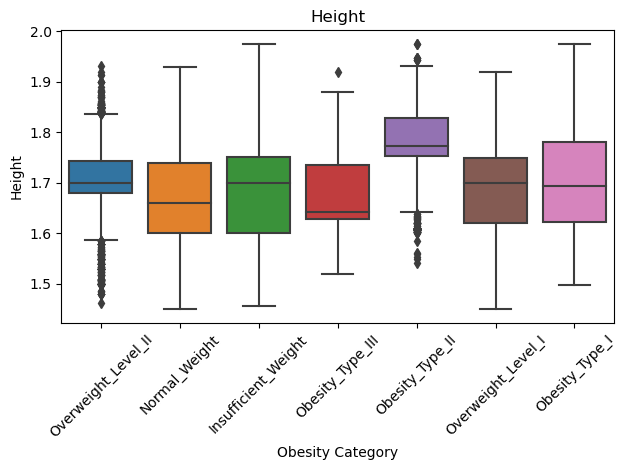

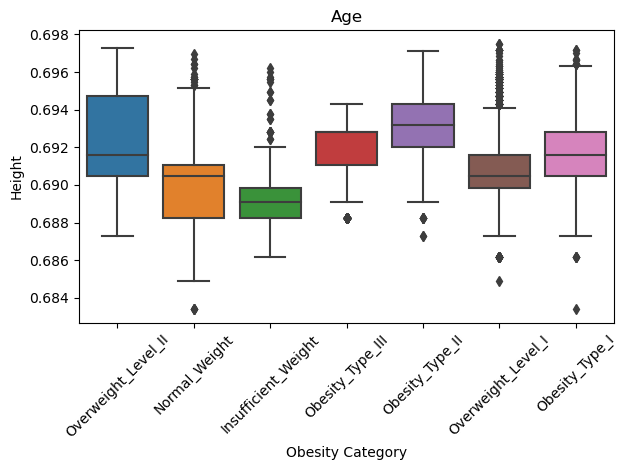

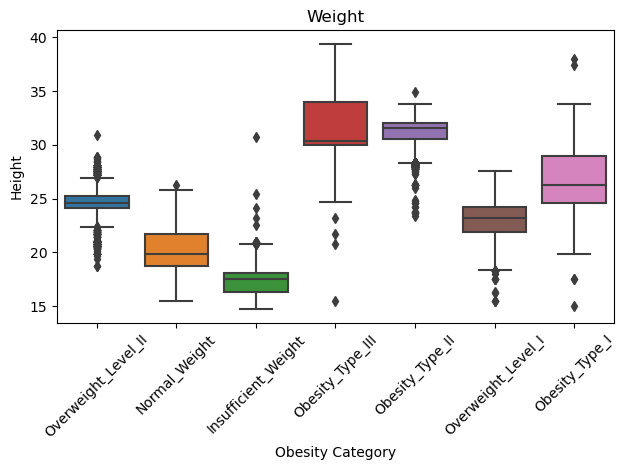

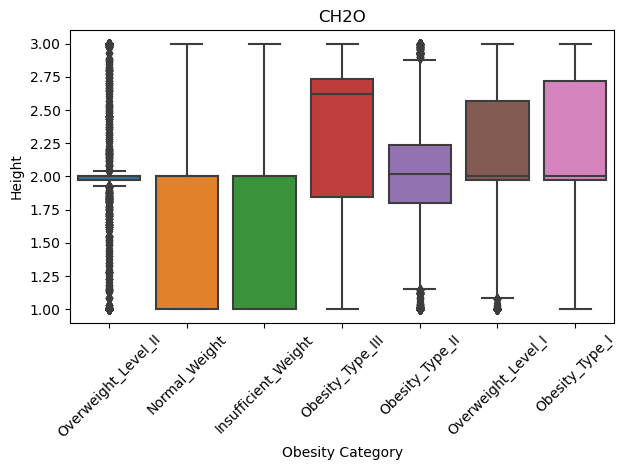

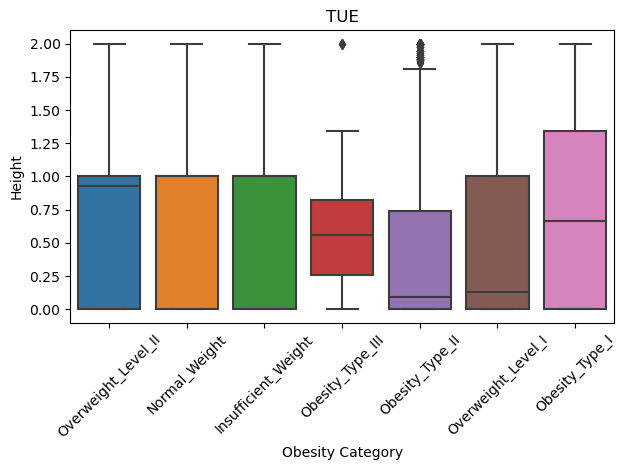

In [21]:
for x in ['Height', 'Age', 'Weight', 'CH2O', 'TUE']:  
    sns.boxplot(x='NObeyesdad', y=x, data=train)
    plt.xlabel('Obesity Category')
    plt.ylabel('Height')
    plt.title(x)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.tight_layout()
    plt.show()

In [22]:

X = train_x.drop('NObeyesdad', axis=1)
y = train_x['NObeyesdad']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter=1000)

model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

Accuracy: 0.86247591522158


In [23]:
knn = KNeighborsClassifier(5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7808285163776493


C:\Users\archi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


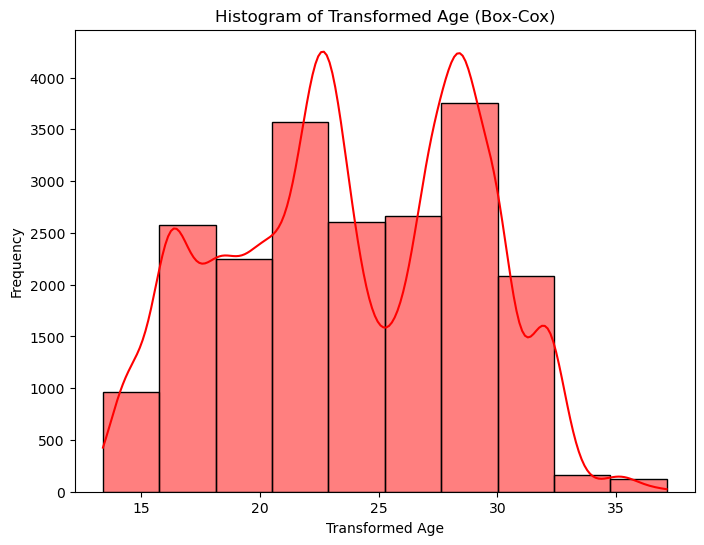

In [24]:
transformed_age, lambda_value = boxcox(train['Weight'])
plt.figure(figsize=(8, 6))
sns.histplot(transformed_age, kde=True, color='red', bins=10)
plt.title('Histogram of Transformed Age (Box-Cox)')
plt.xlabel('Transformed Age')
plt.ylabel('Frequency')
plt.show()

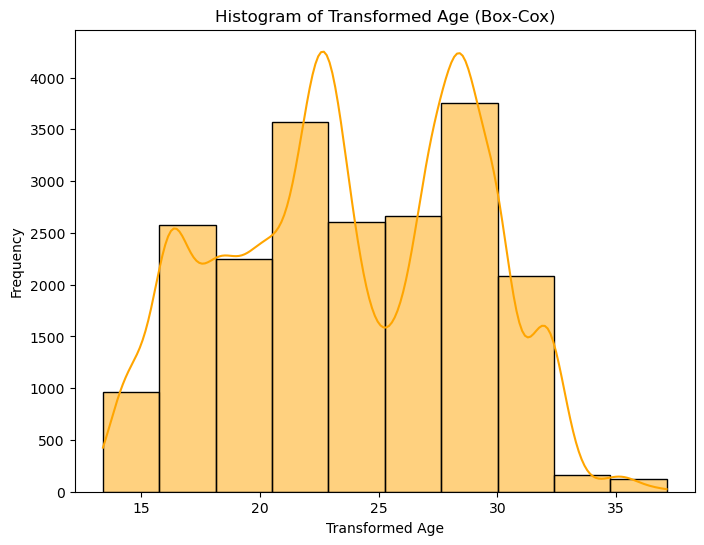

In [25]:
transformed_age, lambda_value = boxcox(train['Weight'])
plt.figure(figsize=(8, 6))
sns.histplot(transformed_age, kde=True, color='orange', bins=10)
plt.title('Histogram of Transformed Age (Box-Cox)')
plt.xlabel('Transformed Age')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='Weight', ylabel='Count'>

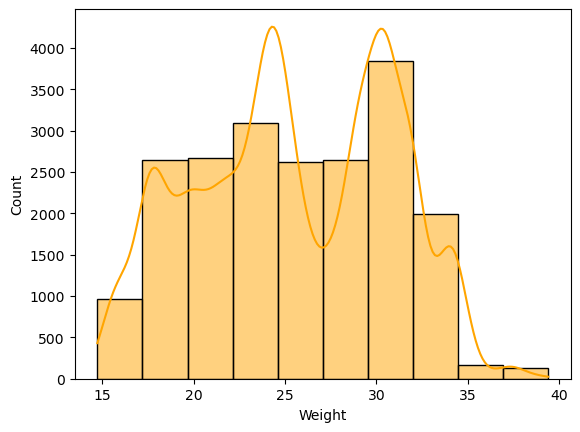

In [26]:
sns.histplot(train['Weight'], kde=True, color='orange', bins=10)

array([[<AxesSubplot:title={'center':'NCP'}>,
        <AxesSubplot:title={'center':'FCVC'}>]], dtype=object)

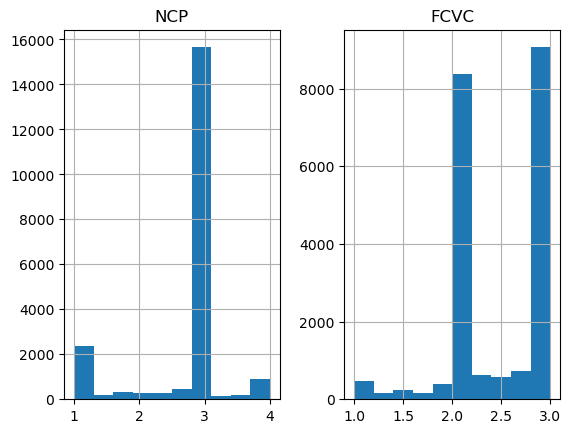

In [27]:
incorrect_cols.hist()

In [28]:
scaler = StandardScaler()
for x in list(incorrect_cols.columns):
    scaler = StandardScaler()
    train_features_scaled = scaler.fit_transform(incorrect_cols[[x]])
    incorrect_cols[x] = train_features_scaled

In [29]:
incorrect_cols.describe().astype('int32')

,NCP,FCVC
count,20758,20758
mean,0,0
std,1,1
min,-2,-2
25%,0,0
50%,0,0
75%,0,1
max,1,1


In [30]:
train_x = pd.concat([train_x, incorrect_cols], axis = 1)

In [31]:
X = train_x.drop('NObeyesdad', axis=1)
y = train_x['NObeyesdad']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter=1000)

model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

Accuracy: 0.86247591522158


In [32]:
coefficients = model.coef_
intercepts = model.intercept_

# Create a DataFrame to store coefficients
coefficients_df = pd.DataFrame(coefficients, columns=X_train.columns)

# Add a row for each class label
coefficients_df.index = model.classes_

# Transpose the DataFrame for easier viewing
coefficients_df = coefficients_df.T

abs(coefficients_df)

,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Gender,1.377981,1.214119,1.239494,3.428948,5.937049,0.403358,0.752137
Age,0.871004,0.519420,0.238803,1.631328,0.487296,0.431306,0.058091
Height,3.742191,1.971101,1.636327,2.107123,2.265135,0.645050,0.349757
Weight,19.844823,10.890514,7.496469,14.315724,11.948576,3.995502,0.970069
family_history_with_overweight,1.110184,0.853028,0.852889,1.452789,0.248058,0.887123,0.296599
FAVC,0.026969,0.060646,0.287209,0.223175,0.440152,0.365695,1.228617
CAEC,0.752343,0.489094,0.084999,0.048982,0.664158,0.278968,0.164329
SMOKE,0.678489,0.184092,0.135165,0.766078,0.102590,0.121948,0.155874
CH2O,0.125917,0.028893,0.237738,0.693481,0.008551,0.281933,0.085338
SCC,0.256405,0.275712,0.072100,1.233765,0.200606,1.340967,0.510813


<AxesSubplot:>

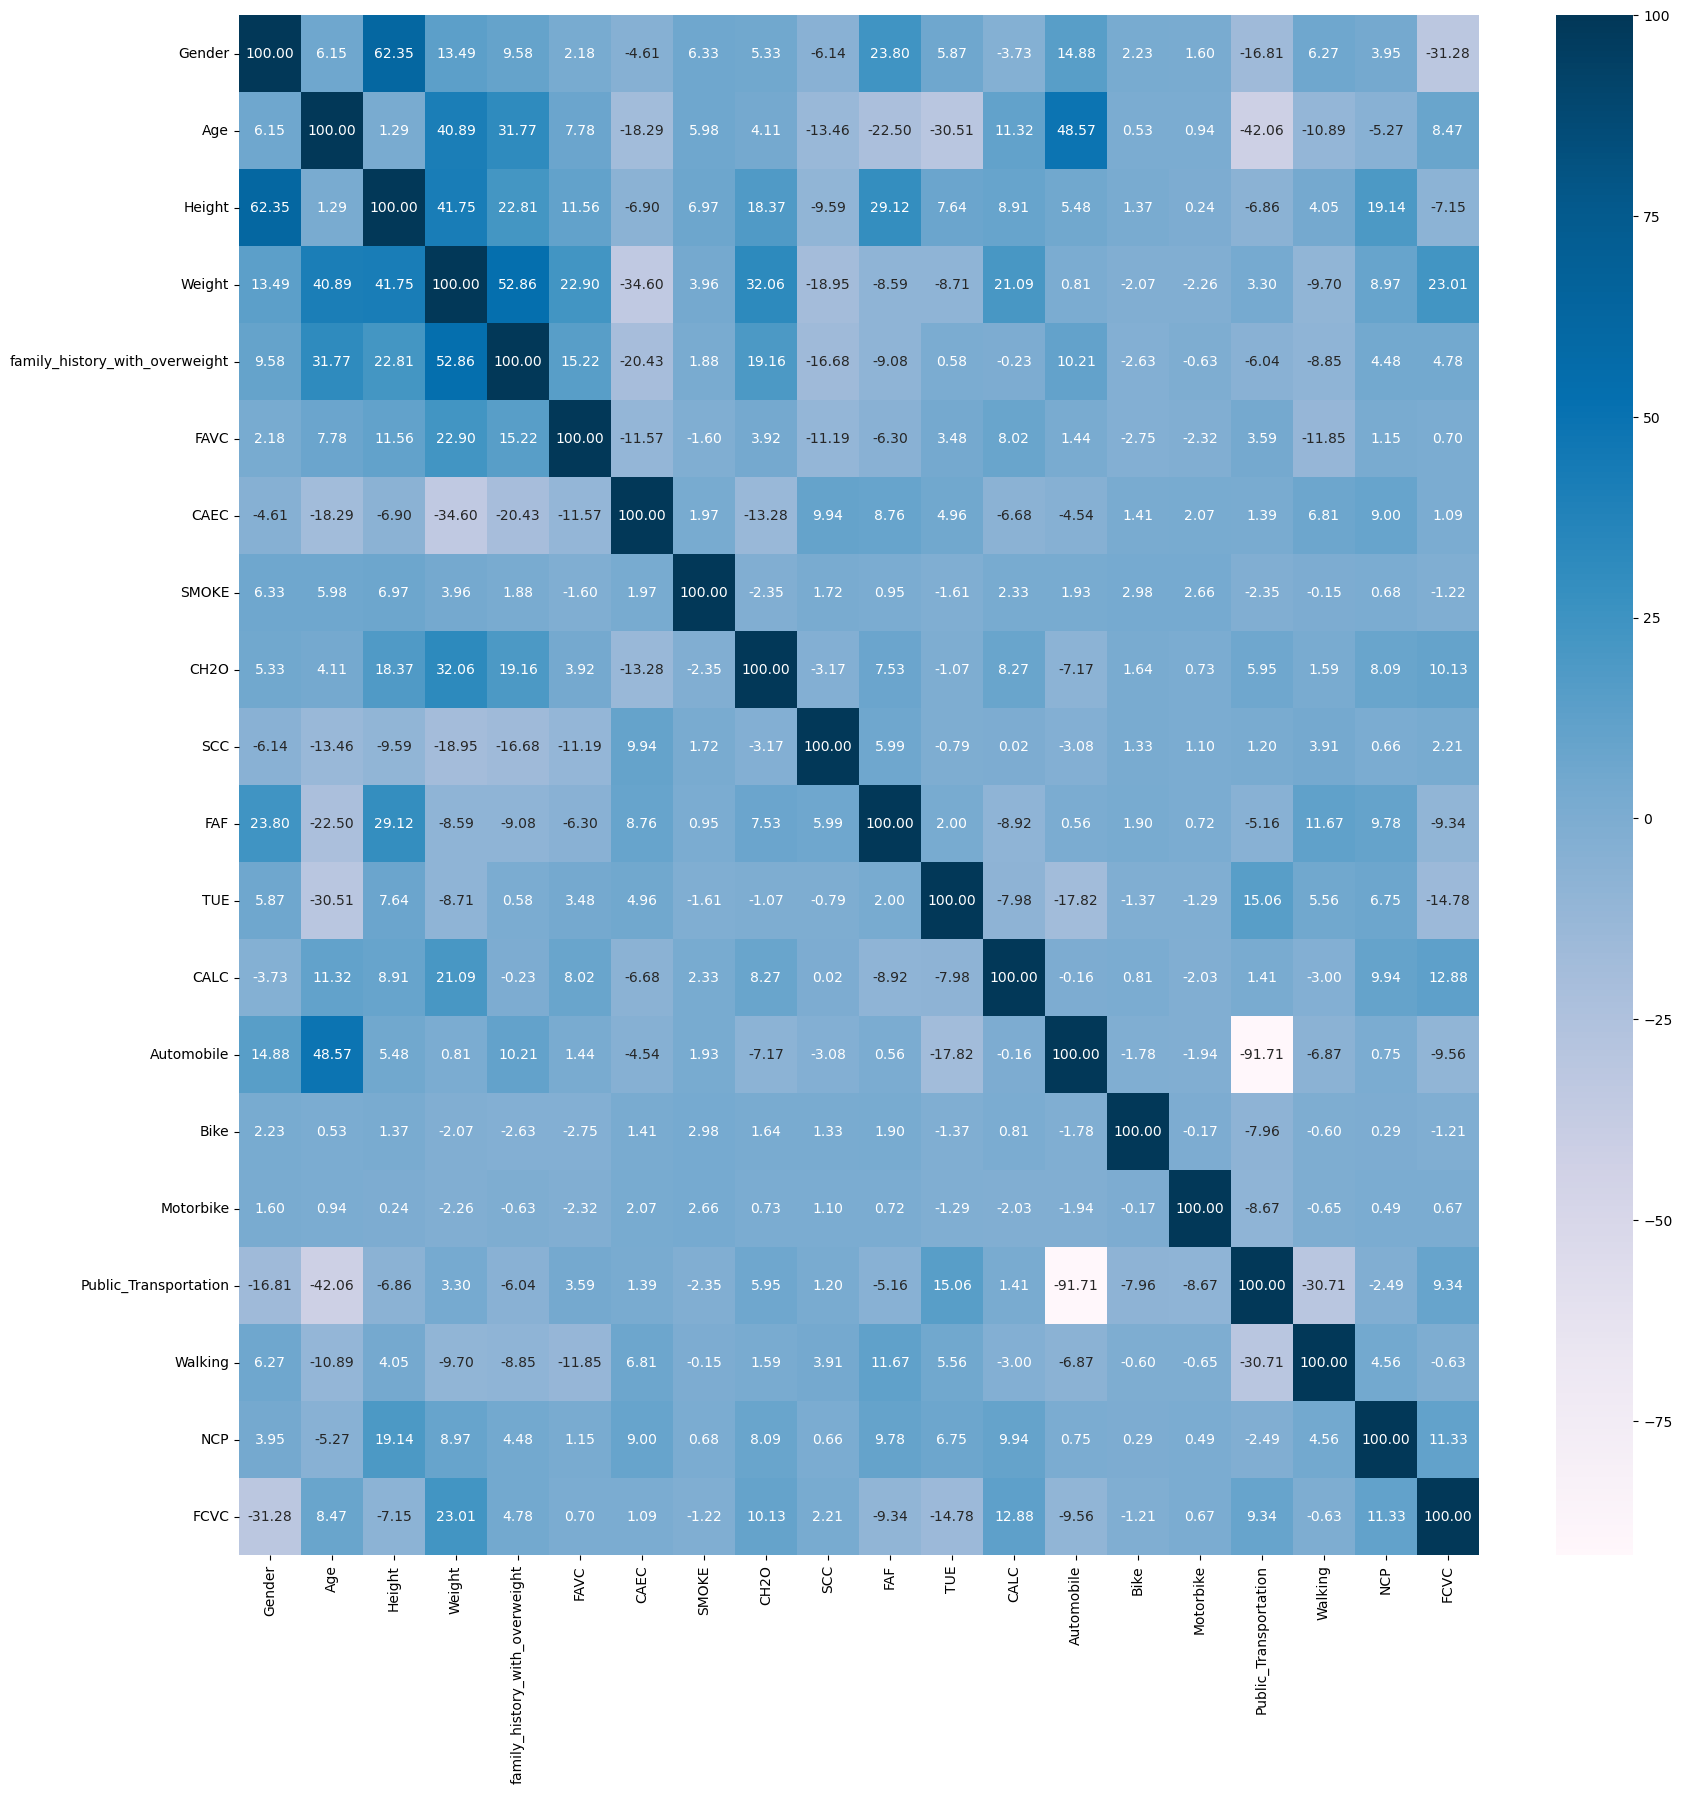

In [33]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_x.corr()*100, annot=True, fmt='.2f', cmap = 'PuBu')

In [34]:
X.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC',
       'Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking',
       'NCP', 'FCVC'],
      dtype='object')

### adding NCP and FCVC doesnt improve the score at all

array([[<AxesSubplot:title={'center':'NCP'}>,
        <AxesSubplot:title={'center':'FCVC'}>],
       [<AxesSubplot:title={'center':'CH2O'}>,
        <AxesSubplot:title={'center':'TUE'}>]], dtype=object)

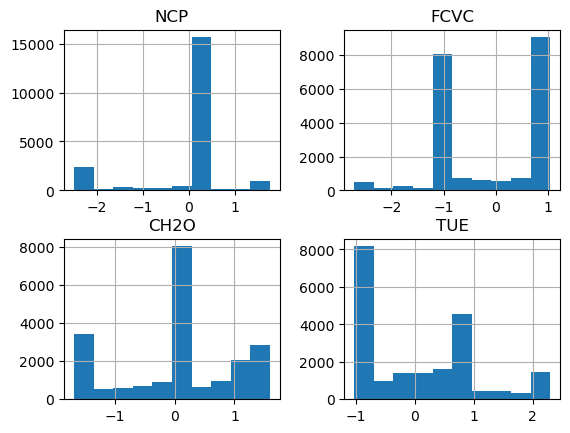

In [35]:
train_x[['NCP', 'FCVC', 'CH2O', 'TUE']].hist()

<AxesSubplot:>

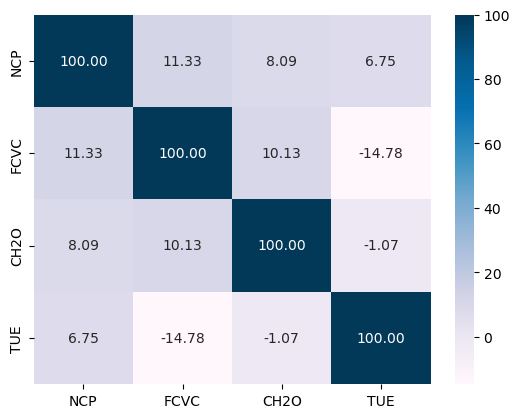

In [36]:
sns.heatmap(train_x[['NCP', 'FCVC', 'CH2O', 'TUE']].corr()*100, annot=True, fmt='.2f', cmap = 'PuBu')

In [37]:
cols = ['Weight', 'Gender', 'Height', 'FCVC', 'Public_Transportation', 'family_history_with_overweight', 'Automobile', 'SCC', 'CALC', 'Age', 'NCP', 'FAVC', 'CAEC', 'Motorbike'] 

In [38]:
X = train_x[cols]
y = train_x['NObeyesdad']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter=1000)

model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.859344894026975

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.94      0.91       524
      Normal_Weight       0.86      0.81      0.84       626
     Obesity_Type_I       0.80      0.82      0.81       543
    Obesity_Type_II       0.95      0.96      0.95       657
   Obesity_Type_III       0.99      1.00      1.00       804
 Overweight_Level_I       0.70      0.71      0.71       484
Overweight_Level_II       0.71      0.67      0.69       514

           accuracy                           0.86      4152
          macro avg       0.84      0.84      0.84      4152
       weighted avg       0.86      0.86      0.86      4152



In [39]:
knn = KNeighborsClassifier(10)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8020231213872833


C:\Users\archi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [40]:
from sklearn.manifold import TSNE

In [41]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[453  68   0   0   0   2   1]
 [ 90 453   2   0   0  55  26]
 [  2   7 431  21   2  29  51]
 [  0   0  22 625   0   1   9]
 [  0   1   0   1 802   0   0]
 [ 10  99  38   0   0 258  79]
 [  2  31  77   8   0  88 308]]


In [42]:
from catboost import CatBoostClassifier

X = train_x.drop('NObeyesdad', axis=1)
y = train_x['NObeyesdad']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Gaussian Naive Bayes
model = CatBoostClassifier()

model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

Learning rate set to 0.091318
0:	learn: 1.6532896	total: 165ms	remaining: 2m 44s
1:	learn: 1.4659449	total: 175ms	remaining: 1m 27s
2:	learn: 1.3236972	total: 186ms	remaining: 1m 1s
3:	learn: 1.2102773	total: 196ms	remaining: 48.7s
4:	learn: 1.1193653	total: 207ms	remaining: 41.1s
5:	learn: 1.0378177	total: 218ms	remaining: 36.1s
6:	learn: 0.9720843	total: 229ms	remaining: 32.5s
7:	learn: 0.9151518	total: 240ms	remaining: 29.7s
8:	learn: 0.8674882	total: 250ms	remaining: 27.5s
9:	learn: 0.8235948	total: 260ms	remaining: 25.8s
10:	learn: 0.7866918	total: 271ms	remaining: 24.3s
11:	learn: 0.7513081	total: 281ms	remaining: 23.2s
12:	learn: 0.7205495	total: 291ms	remaining: 22.1s
13:	learn: 0.6938940	total: 302ms	remaining: 21.3s
14:	learn: 0.6685433	total: 314ms	remaining: 20.6s
15:	learn: 0.6461293	total: 326ms	remaining: 20s
16:	learn: 0.6253850	total: 336ms	remaining: 19.4s
17:	learn: 0.6061468	total: 346ms	remaining: 18.9s
18:	learn: 0.5864044	total: 358ms	remaining: 18.5s
19:	learn: 

175:	learn: 0.2633567	total: 1.88s	remaining: 8.8s
176:	learn: 0.2629230	total: 1.89s	remaining: 8.79s
177:	learn: 0.2623563	total: 1.9s	remaining: 8.78s
178:	learn: 0.2617661	total: 1.91s	remaining: 8.77s
179:	learn: 0.2613745	total: 1.92s	remaining: 8.75s
180:	learn: 0.2610367	total: 1.93s	remaining: 8.74s
181:	learn: 0.2606850	total: 1.94s	remaining: 8.72s
182:	learn: 0.2604062	total: 1.95s	remaining: 8.71s
183:	learn: 0.2597819	total: 1.96s	remaining: 8.69s
184:	learn: 0.2595590	total: 1.97s	remaining: 8.67s
185:	learn: 0.2591845	total: 1.98s	remaining: 8.66s
186:	learn: 0.2587612	total: 1.99s	remaining: 8.64s
187:	learn: 0.2583382	total: 2s	remaining: 8.62s
188:	learn: 0.2580477	total: 2s	remaining: 8.6s
189:	learn: 0.2576067	total: 2.01s	remaining: 8.58s
190:	learn: 0.2572455	total: 2.02s	remaining: 8.57s
191:	learn: 0.2568626	total: 2.03s	remaining: 8.55s
192:	learn: 0.2566077	total: 2.04s	remaining: 8.53s
193:	learn: 0.2563189	total: 2.05s	remaining: 8.51s
194:	learn: 0.2558871

355:	learn: 0.2164315	total: 3.55s	remaining: 6.42s
356:	learn: 0.2163344	total: 3.56s	remaining: 6.41s
357:	learn: 0.2160807	total: 3.57s	remaining: 6.39s
358:	learn: 0.2159266	total: 3.58s	remaining: 6.38s
359:	learn: 0.2156284	total: 3.58s	remaining: 6.37s
360:	learn: 0.2153235	total: 3.59s	remaining: 6.36s
361:	learn: 0.2151837	total: 3.6s	remaining: 6.35s
362:	learn: 0.2150382	total: 3.61s	remaining: 6.34s
363:	learn: 0.2149135	total: 3.62s	remaining: 6.33s
364:	learn: 0.2146953	total: 3.63s	remaining: 6.31s
365:	learn: 0.2145487	total: 3.64s	remaining: 6.3s
366:	learn: 0.2143266	total: 3.65s	remaining: 6.29s
367:	learn: 0.2141622	total: 3.65s	remaining: 6.28s
368:	learn: 0.2138921	total: 3.67s	remaining: 6.27s
369:	learn: 0.2137024	total: 3.68s	remaining: 6.26s
370:	learn: 0.2135742	total: 3.68s	remaining: 6.25s
371:	learn: 0.2133660	total: 3.69s	remaining: 6.24s
372:	learn: 0.2131517	total: 3.7s	remaining: 6.22s
373:	learn: 0.2130305	total: 3.71s	remaining: 6.21s
374:	learn: 0.2

533:	learn: 0.1890717	total: 5.21s	remaining: 4.55s
534:	learn: 0.1889192	total: 5.22s	remaining: 4.54s
535:	learn: 0.1888259	total: 5.23s	remaining: 4.53s
536:	learn: 0.1887336	total: 5.24s	remaining: 4.52s
537:	learn: 0.1886794	total: 5.25s	remaining: 4.51s
538:	learn: 0.1885252	total: 5.26s	remaining: 4.5s
539:	learn: 0.1883995	total: 5.27s	remaining: 4.49s
540:	learn: 0.1883245	total: 5.28s	remaining: 4.48s
541:	learn: 0.1882158	total: 5.29s	remaining: 4.47s
542:	learn: 0.1881515	total: 5.3s	remaining: 4.46s
543:	learn: 0.1878732	total: 5.31s	remaining: 4.45s
544:	learn: 0.1877296	total: 5.32s	remaining: 4.44s
545:	learn: 0.1876092	total: 5.33s	remaining: 4.43s
546:	learn: 0.1875113	total: 5.33s	remaining: 4.42s
547:	learn: 0.1873457	total: 5.34s	remaining: 4.41s
548:	learn: 0.1871840	total: 5.35s	remaining: 4.4s
549:	learn: 0.1870777	total: 5.36s	remaining: 4.39s
550:	learn: 0.1870315	total: 5.37s	remaining: 4.38s
551:	learn: 0.1869804	total: 5.38s	remaining: 4.36s
552:	learn: 0.1

709:	learn: 0.1680030	total: 6.87s	remaining: 2.81s
710:	learn: 0.1678847	total: 6.88s	remaining: 2.8s
711:	learn: 0.1677830	total: 6.89s	remaining: 2.79s
712:	learn: 0.1676613	total: 6.91s	remaining: 2.78s
713:	learn: 0.1675055	total: 6.92s	remaining: 2.77s
714:	learn: 0.1674616	total: 6.94s	remaining: 2.77s
715:	learn: 0.1674046	total: 6.95s	remaining: 2.75s
716:	learn: 0.1673127	total: 6.96s	remaining: 2.75s
717:	learn: 0.1672077	total: 6.98s	remaining: 2.74s
718:	learn: 0.1671207	total: 6.99s	remaining: 2.73s
719:	learn: 0.1669499	total: 7s	remaining: 2.72s
720:	learn: 0.1668717	total: 7.01s	remaining: 2.71s
721:	learn: 0.1667945	total: 7.02s	remaining: 2.7s
722:	learn: 0.1667316	total: 7.03s	remaining: 2.69s
723:	learn: 0.1666341	total: 7.04s	remaining: 2.68s
724:	learn: 0.1665048	total: 7.05s	remaining: 2.67s
725:	learn: 0.1664570	total: 7.06s	remaining: 2.67s
726:	learn: 0.1663140	total: 7.07s	remaining: 2.66s
727:	learn: 0.1662496	total: 7.09s	remaining: 2.65s
728:	learn: 0.166

878:	learn: 0.1517304	total: 8.53s	remaining: 1.17s
879:	learn: 0.1516418	total: 8.54s	remaining: 1.16s
880:	learn: 0.1515921	total: 8.55s	remaining: 1.16s
881:	learn: 0.1513887	total: 8.56s	remaining: 1.15s
882:	learn: 0.1512978	total: 8.57s	remaining: 1.14s
883:	learn: 0.1512443	total: 8.58s	remaining: 1.13s
884:	learn: 0.1511823	total: 8.6s	remaining: 1.12s
885:	learn: 0.1511187	total: 8.61s	remaining: 1.11s
886:	learn: 0.1510382	total: 8.62s	remaining: 1.1s
887:	learn: 0.1509872	total: 8.63s	remaining: 1.09s
888:	learn: 0.1508593	total: 8.64s	remaining: 1.08s
889:	learn: 0.1507832	total: 8.65s	remaining: 1.07s
890:	learn: 0.1507041	total: 8.66s	remaining: 1.06s
891:	learn: 0.1506342	total: 8.67s	remaining: 1.05s
892:	learn: 0.1505134	total: 8.68s	remaining: 1.04s
893:	learn: 0.1503868	total: 8.69s	remaining: 1.03s
894:	learn: 0.1503197	total: 8.7s	remaining: 1.02s
895:	learn: 0.1502553	total: 8.71s	remaining: 1.01s
896:	learn: 0.1501869	total: 8.72s	remaining: 1s
897:	learn: 0.1500

In [43]:
from catboost import CatBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import uniform, randint


# Create an instance of CatBoost classifier
clf = CatBoostClassifier()

# Define the distributions of hyperparameters to sample from
param_distributions = {
    'learning_rate': uniform(0.01, 0.1),
    'depth': randint(4, 10),
    'iterations': randint(100, 500)
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_distributions, n_iter=10, cv=3, random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best parameters:", random_search.best_params_)

# Make predictions on the test data using the best model
best_model = random_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluate the accuracy of the best model
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

0:	learn: 1.8513443	total: 17.5ms	remaining: 7.84s
1:	learn: 1.7700811	total: 34.8ms	remaining: 7.76s
2:	learn: 1.6999861	total: 52.7ms	remaining: 7.82s
3:	learn: 1.6350311	total: 70.3ms	remaining: 7.8s
4:	learn: 1.5734976	total: 87.9ms	remaining: 7.79s
5:	learn: 1.5191613	total: 105ms	remaining: 7.77s
6:	learn: 1.4698911	total: 123ms	remaining: 7.75s
7:	learn: 1.4214840	total: 139ms	remaining: 7.67s
8:	learn: 1.3821765	total: 158ms	remaining: 7.71s
9:	learn: 1.3407050	total: 175ms	remaining: 7.66s
10:	learn: 1.3025815	total: 192ms	remaining: 7.65s
11:	learn: 1.2654240	total: 212ms	remaining: 7.68s
12:	learn: 1.2294375	total: 229ms	remaining: 7.67s
13:	learn: 1.1955851	total: 247ms	remaining: 7.67s
14:	learn: 1.1659107	total: 267ms	remaining: 7.7s
15:	learn: 1.1349946	total: 286ms	remaining: 7.72s
16:	learn: 1.1077181	total: 305ms	remaining: 7.75s
17:	learn: 1.0821559	total: 324ms	remaining: 7.74s
18:	learn: 1.0580512	total: 343ms	remaining: 7.74s
19:	learn: 1.0373295	total: 361ms	rema

166:	learn: 0.3511549	total: 3.03s	remaining: 5.1s
167:	learn: 0.3501965	total: 3.05s	remaining: 5.08s
168:	learn: 0.3495214	total: 3.07s	remaining: 5.07s
169:	learn: 0.3490059	total: 3.09s	remaining: 5.05s
170:	learn: 0.3481834	total: 3.11s	remaining: 5.04s
171:	learn: 0.3474907	total: 3.13s	remaining: 5.02s
172:	learn: 0.3468511	total: 3.15s	remaining: 5s
173:	learn: 0.3460063	total: 3.17s	remaining: 4.99s
174:	learn: 0.3453439	total: 3.19s	remaining: 4.97s
175:	learn: 0.3447900	total: 3.21s	remaining: 4.96s
176:	learn: 0.3441277	total: 3.23s	remaining: 4.94s
177:	learn: 0.3436019	total: 3.25s	remaining: 4.92s
178:	learn: 0.3429530	total: 3.27s	remaining: 4.91s
179:	learn: 0.3421433	total: 3.28s	remaining: 4.89s
180:	learn: 0.3414955	total: 3.3s	remaining: 4.87s
181:	learn: 0.3407039	total: 3.32s	remaining: 4.86s
182:	learn: 0.3400951	total: 3.34s	remaining: 4.84s
183:	learn: 0.3393902	total: 3.36s	remaining: 4.82s
184:	learn: 0.3389421	total: 3.38s	remaining: 4.8s
185:	learn: 0.3383

332:	learn: 0.2783790	total: 6.42s	remaining: 2.22s
333:	learn: 0.2780753	total: 6.44s	remaining: 2.2s
334:	learn: 0.2778443	total: 6.46s	remaining: 2.18s
335:	learn: 0.2775581	total: 6.48s	remaining: 2.16s
336:	learn: 0.2773631	total: 6.5s	remaining: 2.14s
337:	learn: 0.2770067	total: 6.52s	remaining: 2.12s
338:	learn: 0.2766805	total: 6.54s	remaining: 2.1s
339:	learn: 0.2763991	total: 6.56s	remaining: 2.08s
340:	learn: 0.2759223	total: 6.58s	remaining: 2.06s
341:	learn: 0.2757834	total: 6.6s	remaining: 2.04s
342:	learn: 0.2755061	total: 6.62s	remaining: 2.03s
343:	learn: 0.2753535	total: 6.64s	remaining: 2.01s
344:	learn: 0.2751860	total: 6.66s	remaining: 1.99s
345:	learn: 0.2749966	total: 6.68s	remaining: 1.97s
346:	learn: 0.2747090	total: 6.7s	remaining: 1.95s
347:	learn: 0.2744931	total: 6.71s	remaining: 1.93s
348:	learn: 0.2742098	total: 6.74s	remaining: 1.91s
349:	learn: 0.2739300	total: 6.75s	remaining: 1.89s
350:	learn: 0.2736633	total: 6.78s	remaining: 1.87s
351:	learn: 0.273

47:	learn: 0.6669891	total: 911ms	remaining: 7.59s
48:	learn: 0.6591790	total: 931ms	remaining: 7.58s
49:	learn: 0.6512545	total: 954ms	remaining: 7.59s
50:	learn: 0.6439778	total: 975ms	remaining: 7.59s
51:	learn: 0.6361432	total: 996ms	remaining: 7.58s
52:	learn: 0.6299815	total: 1.01s	remaining: 7.57s
53:	learn: 0.6228821	total: 1.03s	remaining: 7.55s
54:	learn: 0.6165314	total: 1.05s	remaining: 7.52s
55:	learn: 0.6093404	total: 1.07s	remaining: 7.5s
56:	learn: 0.6033133	total: 1.09s	remaining: 7.49s
57:	learn: 0.5970415	total: 1.11s	remaining: 7.46s
58:	learn: 0.5911769	total: 1.13s	remaining: 7.44s
59:	learn: 0.5855300	total: 1.15s	remaining: 7.43s
60:	learn: 0.5793490	total: 1.17s	remaining: 7.41s
61:	learn: 0.5738834	total: 1.19s	remaining: 7.39s
62:	learn: 0.5680212	total: 1.21s	remaining: 7.37s
63:	learn: 0.5629091	total: 1.22s	remaining: 7.34s
64:	learn: 0.5581251	total: 1.24s	remaining: 7.31s
65:	learn: 0.5537234	total: 1.26s	remaining: 7.29s
66:	learn: 0.5487677	total: 1.28

215:	learn: 0.3250619	total: 4.11s	remaining: 4.41s
216:	learn: 0.3244335	total: 4.12s	remaining: 4.39s
217:	learn: 0.3239778	total: 4.14s	remaining: 4.37s
218:	learn: 0.3233231	total: 4.16s	remaining: 4.35s
219:	learn: 0.3229524	total: 4.18s	remaining: 4.33s
220:	learn: 0.3223526	total: 4.2s	remaining: 4.31s
221:	learn: 0.3217180	total: 4.22s	remaining: 4.29s
222:	learn: 0.3211386	total: 4.24s	remaining: 4.27s
223:	learn: 0.3206301	total: 4.25s	remaining: 4.25s
224:	learn: 0.3199391	total: 4.27s	remaining: 4.23s
225:	learn: 0.3195307	total: 4.29s	remaining: 4.21s
226:	learn: 0.3190139	total: 4.31s	remaining: 4.19s
227:	learn: 0.3185967	total: 4.33s	remaining: 4.17s
228:	learn: 0.3179177	total: 4.34s	remaining: 4.16s
229:	learn: 0.3173897	total: 4.36s	remaining: 4.13s
230:	learn: 0.3170441	total: 4.38s	remaining: 4.11s
231:	learn: 0.3166513	total: 4.4s	remaining: 4.09s
232:	learn: 0.3161693	total: 4.42s	remaining: 4.08s
233:	learn: 0.3157356	total: 4.44s	remaining: 4.06s
234:	learn: 0.

378:	learn: 0.2679965	total: 7.11s	remaining: 1.29s
379:	learn: 0.2677045	total: 7.13s	remaining: 1.28s
380:	learn: 0.2674894	total: 7.15s	remaining: 1.26s
381:	learn: 0.2671860	total: 7.17s	remaining: 1.24s
382:	learn: 0.2669277	total: 7.18s	remaining: 1.22s
383:	learn: 0.2666986	total: 7.21s	remaining: 1.2s
384:	learn: 0.2663528	total: 7.22s	remaining: 1.18s
385:	learn: 0.2661550	total: 7.24s	remaining: 1.16s
386:	learn: 0.2659471	total: 7.26s	remaining: 1.14s
387:	learn: 0.2657939	total: 7.28s	remaining: 1.13s
388:	learn: 0.2656090	total: 7.3s	remaining: 1.11s
389:	learn: 0.2654182	total: 7.32s	remaining: 1.09s
390:	learn: 0.2652080	total: 7.34s	remaining: 1.07s
391:	learn: 0.2650094	total: 7.36s	remaining: 1.05s
392:	learn: 0.2647677	total: 7.38s	remaining: 1.03s
393:	learn: 0.2644872	total: 7.4s	remaining: 1.01s
394:	learn: 0.2641401	total: 7.42s	remaining: 996ms
395:	learn: 0.2639359	total: 7.44s	remaining: 977ms
396:	learn: 0.2636854	total: 7.46s	remaining: 959ms
397:	learn: 0.2

98:	learn: 0.4558289	total: 2.08s	remaining: 7.34s
99:	learn: 0.4538022	total: 2.11s	remaining: 7.36s
100:	learn: 0.4517586	total: 2.14s	remaining: 7.34s
101:	learn: 0.4501162	total: 2.16s	remaining: 7.33s
102:	learn: 0.4482353	total: 2.19s	remaining: 7.32s
103:	learn: 0.4461225	total: 2.21s	remaining: 7.29s
104:	learn: 0.4441070	total: 2.23s	remaining: 7.27s
105:	learn: 0.4420701	total: 2.25s	remaining: 7.25s
106:	learn: 0.4404634	total: 2.27s	remaining: 7.24s
107:	learn: 0.4385979	total: 2.29s	remaining: 7.22s
108:	learn: 0.4369077	total: 2.31s	remaining: 7.2s
109:	learn: 0.4347086	total: 2.33s	remaining: 7.18s
110:	learn: 0.4330025	total: 2.36s	remaining: 7.16s
111:	learn: 0.4313299	total: 2.38s	remaining: 7.15s
112:	learn: 0.4292415	total: 2.41s	remaining: 7.14s
113:	learn: 0.4271280	total: 2.43s	remaining: 7.13s
114:	learn: 0.4254515	total: 2.45s	remaining: 7.1s
115:	learn: 0.4233277	total: 2.47s	remaining: 7.07s
116:	learn: 0.4215799	total: 2.49s	remaining: 7.04s
117:	learn: 0.41

261:	learn: 0.3141250	total: 5.33s	remaining: 3.78s
262:	learn: 0.3137479	total: 5.35s	remaining: 3.76s
263:	learn: 0.3134892	total: 5.37s	remaining: 3.74s
264:	learn: 0.3130865	total: 5.39s	remaining: 3.72s
265:	learn: 0.3127895	total: 5.41s	remaining: 3.7s
266:	learn: 0.3123484	total: 5.43s	remaining: 3.68s
267:	learn: 0.3119175	total: 5.45s	remaining: 3.66s
268:	learn: 0.3114511	total: 5.47s	remaining: 3.64s
269:	learn: 0.3111045	total: 5.49s	remaining: 3.62s
270:	learn: 0.3105156	total: 5.51s	remaining: 3.6s
271:	learn: 0.3101143	total: 5.53s	remaining: 3.58s
272:	learn: 0.3098302	total: 5.55s	remaining: 3.56s
273:	learn: 0.3095634	total: 5.57s	remaining: 3.53s
274:	learn: 0.3090809	total: 5.58s	remaining: 3.51s
275:	learn: 0.3086501	total: 5.6s	remaining: 3.49s
276:	learn: 0.3082582	total: 5.62s	remaining: 3.47s
277:	learn: 0.3079023	total: 5.64s	remaining: 3.45s
278:	learn: 0.3074981	total: 5.66s	remaining: 3.43s
279:	learn: 0.3071900	total: 5.67s	remaining: 3.4s
280:	learn: 0.30

427:	learn: 0.2666621	total: 8.29s	remaining: 387ms
428:	learn: 0.2663617	total: 8.31s	remaining: 368ms
429:	learn: 0.2662147	total: 8.33s	remaining: 349ms
430:	learn: 0.2658981	total: 8.35s	remaining: 329ms
431:	learn: 0.2656379	total: 8.37s	remaining: 310ms
432:	learn: 0.2654652	total: 8.39s	remaining: 291ms
433:	learn: 0.2652867	total: 8.4s	remaining: 271ms
434:	learn: 0.2651069	total: 8.42s	remaining: 252ms
435:	learn: 0.2649024	total: 8.45s	remaining: 232ms
436:	learn: 0.2646665	total: 8.46s	remaining: 213ms
437:	learn: 0.2644572	total: 8.48s	remaining: 194ms
438:	learn: 0.2642800	total: 8.5s	remaining: 174ms
439:	learn: 0.2640526	total: 8.52s	remaining: 155ms
440:	learn: 0.2638077	total: 8.54s	remaining: 135ms
441:	learn: 0.2636250	total: 8.55s	remaining: 116ms
442:	learn: 0.2634715	total: 8.57s	remaining: 96.7ms
443:	learn: 0.2633283	total: 8.59s	remaining: 77.4ms
444:	learn: 0.2630587	total: 8.61s	remaining: 58ms
445:	learn: 0.2628225	total: 8.63s	remaining: 38.7ms
446:	learn: 

24:	learn: 0.9779811	total: 914ms	remaining: 3.47s
25:	learn: 0.9588249	total: 950ms	remaining: 3.43s
26:	learn: 0.9419865	total: 987ms	remaining: 3.4s
27:	learn: 0.9264576	total: 1.02s	remaining: 3.35s
28:	learn: 0.9110980	total: 1.05s	remaining: 3.3s
29:	learn: 0.8955073	total: 1.08s	remaining: 3.26s
30:	learn: 0.8813006	total: 1.12s	remaining: 3.21s
31:	learn: 0.8667930	total: 1.15s	remaining: 3.17s
32:	learn: 0.8528697	total: 1.19s	remaining: 3.13s
33:	learn: 0.8387155	total: 1.22s	remaining: 3.08s
34:	learn: 0.8262125	total: 1.25s	remaining: 3.04s
35:	learn: 0.8136414	total: 1.28s	remaining: 2.99s
36:	learn: 0.8010664	total: 1.31s	remaining: 2.95s
37:	learn: 0.7896776	total: 1.35s	remaining: 2.9s
38:	learn: 0.7780011	total: 1.38s	remaining: 2.87s
39:	learn: 0.7669246	total: 1.42s	remaining: 2.85s
40:	learn: 0.7561635	total: 1.46s	remaining: 2.81s
41:	learn: 0.7465705	total: 1.49s	remaining: 2.77s
42:	learn: 0.7375925	total: 1.53s	remaining: 2.73s
43:	learn: 0.7273631	total: 1.56s	

69:	learn: 0.5600599	total: 2.54s	remaining: 1.82s
70:	learn: 0.5547569	total: 2.58s	remaining: 1.78s
71:	learn: 0.5503840	total: 2.61s	remaining: 1.74s
72:	learn: 0.5462732	total: 2.65s	remaining: 1.7s
73:	learn: 0.5419394	total: 2.68s	remaining: 1.67s
74:	learn: 0.5370901	total: 2.72s	remaining: 1.63s
75:	learn: 0.5327968	total: 2.75s	remaining: 1.59s
76:	learn: 0.5287467	total: 2.78s	remaining: 1.55s
77:	learn: 0.5249668	total: 2.82s	remaining: 1.52s
78:	learn: 0.5206185	total: 2.85s	remaining: 1.48s
79:	learn: 0.5166271	total: 2.89s	remaining: 1.44s
80:	learn: 0.5126287	total: 2.92s	remaining: 1.41s
81:	learn: 0.5091196	total: 2.95s	remaining: 1.37s
82:	learn: 0.5062709	total: 2.99s	remaining: 1.33s
83:	learn: 0.5027000	total: 3.02s	remaining: 1.3s
84:	learn: 0.4991892	total: 3.06s	remaining: 1.26s
85:	learn: 0.4960734	total: 3.09s	remaining: 1.22s
86:	learn: 0.4929886	total: 3.12s	remaining: 1.19s
87:	learn: 0.4894330	total: 3.15s	remaining: 1.15s
88:	learn: 0.4862505	total: 3.19s

130:	learn: 0.5430038	total: 1.29s	remaining: 1.8s
131:	learn: 0.5405615	total: 1.3s	remaining: 1.79s
132:	learn: 0.5380683	total: 1.31s	remaining: 1.78s
133:	learn: 0.5356862	total: 1.32s	remaining: 1.77s
134:	learn: 0.5338898	total: 1.32s	remaining: 1.76s
135:	learn: 0.5319475	total: 1.33s	remaining: 1.75s
136:	learn: 0.5301367	total: 1.34s	remaining: 1.73s
137:	learn: 0.5280744	total: 1.35s	remaining: 1.72s
138:	learn: 0.5259527	total: 1.36s	remaining: 1.71s
139:	learn: 0.5239660	total: 1.37s	remaining: 1.7s
140:	learn: 0.5219502	total: 1.38s	remaining: 1.69s
141:	learn: 0.5199394	total: 1.39s	remaining: 1.68s
142:	learn: 0.5181117	total: 1.4s	remaining: 1.67s
143:	learn: 0.5159169	total: 1.4s	remaining: 1.66s
144:	learn: 0.5141530	total: 1.41s	remaining: 1.65s
145:	learn: 0.5125970	total: 1.42s	remaining: 1.64s
146:	learn: 0.5107437	total: 1.43s	remaining: 1.63s
147:	learn: 0.5091728	total: 1.44s	remaining: 1.61s
148:	learn: 0.5075425	total: 1.45s	remaining: 1.6s
149:	learn: 0.5057

308:	learn: 0.3714469	total: 2.94s	remaining: 47.6ms
309:	learn: 0.3710464	total: 2.95s	remaining: 38.1ms
310:	learn: 0.3704911	total: 2.96s	remaining: 28.5ms
311:	learn: 0.3701625	total: 2.97s	remaining: 19ms
312:	learn: 0.3697415	total: 2.98s	remaining: 9.51ms
313:	learn: 0.3693121	total: 2.98s	remaining: 0us
0:	learn: 1.8933769	total: 9.8ms	remaining: 3.07s
1:	learn: 1.8468255	total: 19.5ms	remaining: 3.04s
2:	learn: 1.8033481	total: 29.2ms	remaining: 3.03s
3:	learn: 1.7612138	total: 39.7ms	remaining: 3.08s
4:	learn: 1.7225475	total: 49.6ms	remaining: 3.06s
5:	learn: 1.6841120	total: 61ms	remaining: 3.13s
6:	learn: 1.6492104	total: 71.7ms	remaining: 3.14s
7:	learn: 1.6167960	total: 80.8ms	remaining: 3.09s
8:	learn: 1.5860328	total: 89.9ms	remaining: 3.05s
9:	learn: 1.5565163	total: 99.1ms	remaining: 3.01s
10:	learn: 1.5266679	total: 109ms	remaining: 3s
11:	learn: 1.4978195	total: 120ms	remaining: 3.02s
12:	learn: 1.4708725	total: 131ms	remaining: 3.03s
13:	learn: 1.4483257	total: 14

167:	learn: 0.4850209	total: 1.81s	remaining: 1.57s
168:	learn: 0.4834617	total: 1.82s	remaining: 1.56s
169:	learn: 0.4819764	total: 1.83s	remaining: 1.55s
170:	learn: 0.4805661	total: 1.84s	remaining: 1.54s
171:	learn: 0.4790964	total: 1.85s	remaining: 1.53s
172:	learn: 0.4779882	total: 1.86s	remaining: 1.52s
173:	learn: 0.4763888	total: 1.87s	remaining: 1.5s
174:	learn: 0.4751405	total: 1.88s	remaining: 1.49s
175:	learn: 0.4740551	total: 1.89s	remaining: 1.48s
176:	learn: 0.4731175	total: 1.9s	remaining: 1.47s
177:	learn: 0.4719467	total: 1.91s	remaining: 1.46s
178:	learn: 0.4708405	total: 1.92s	remaining: 1.45s
179:	learn: 0.4693240	total: 1.93s	remaining: 1.44s
180:	learn: 0.4681556	total: 1.94s	remaining: 1.42s
181:	learn: 0.4671687	total: 1.95s	remaining: 1.41s
182:	learn: 0.4656510	total: 1.95s	remaining: 1.4s
183:	learn: 0.4647026	total: 1.96s	remaining: 1.39s
184:	learn: 0.4631966	total: 1.97s	remaining: 1.37s
185:	learn: 0.4621428	total: 1.98s	remaining: 1.36s
186:	learn: 0.4

34:	learn: 1.0844759	total: 320ms	remaining: 2.55s
35:	learn: 1.0722594	total: 329ms	remaining: 2.54s
36:	learn: 1.0599607	total: 337ms	remaining: 2.52s
37:	learn: 1.0500858	total: 345ms	remaining: 2.5s
38:	learn: 1.0396441	total: 353ms	remaining: 2.49s
39:	learn: 1.0278825	total: 361ms	remaining: 2.47s
40:	learn: 1.0179292	total: 370ms	remaining: 2.46s
41:	learn: 1.0061051	total: 378ms	remaining: 2.45s
42:	learn: 0.9970888	total: 388ms	remaining: 2.44s
43:	learn: 0.9863926	total: 396ms	remaining: 2.43s
44:	learn: 0.9767169	total: 404ms	remaining: 2.41s
45:	learn: 0.9671498	total: 412ms	remaining: 2.4s
46:	learn: 0.9583374	total: 420ms	remaining: 2.39s
47:	learn: 0.9488947	total: 428ms	remaining: 2.37s
48:	learn: 0.9399430	total: 436ms	remaining: 2.36s
49:	learn: 0.9313520	total: 445ms	remaining: 2.35s
50:	learn: 0.9224813	total: 453ms	remaining: 2.33s
51:	learn: 0.9136321	total: 461ms	remaining: 2.32s
52:	learn: 0.9053117	total: 469ms	remaining: 2.31s
53:	learn: 0.8966110	total: 478ms

204:	learn: 0.4516392	total: 1.76s	remaining: 938ms
205:	learn: 0.4508300	total: 1.77s	remaining: 929ms
206:	learn: 0.4500472	total: 1.78s	remaining: 920ms
207:	learn: 0.4491084	total: 1.79s	remaining: 912ms
208:	learn: 0.4483164	total: 1.8s	remaining: 902ms
209:	learn: 0.4473662	total: 1.8s	remaining: 893ms
210:	learn: 0.4466157	total: 1.81s	remaining: 885ms
211:	learn: 0.4457615	total: 1.82s	remaining: 876ms
212:	learn: 0.4447558	total: 1.83s	remaining: 868ms
213:	learn: 0.4440276	total: 1.84s	remaining: 859ms
214:	learn: 0.4431299	total: 1.84s	remaining: 850ms
215:	learn: 0.4422384	total: 1.85s	remaining: 841ms
216:	learn: 0.4414690	total: 1.87s	remaining: 835ms
217:	learn: 0.4409508	total: 1.88s	remaining: 827ms
218:	learn: 0.4404171	total: 1.89s	remaining: 819ms
219:	learn: 0.4396450	total: 1.89s	remaining: 810ms
220:	learn: 0.4387498	total: 1.91s	remaining: 802ms
221:	learn: 0.4381465	total: 1.92s	remaining: 795ms
222:	learn: 0.4371142	total: 1.93s	remaining: 787ms
223:	learn: 0.

49:	learn: 0.6890600	total: 1.84s	remaining: 5.49s
50:	learn: 0.6809535	total: 1.88s	remaining: 5.45s
51:	learn: 0.6733470	total: 1.91s	remaining: 5.41s
52:	learn: 0.6660260	total: 1.95s	remaining: 5.37s
53:	learn: 0.6586161	total: 1.98s	remaining: 5.32s
54:	learn: 0.6517112	total: 2.02s	remaining: 5.28s
55:	learn: 0.6453668	total: 2.05s	remaining: 5.24s
56:	learn: 0.6384070	total: 2.08s	remaining: 5.19s
57:	learn: 0.6312189	total: 2.12s	remaining: 5.14s
58:	learn: 0.6251876	total: 2.15s	remaining: 5.09s
59:	learn: 0.6189474	total: 2.18s	remaining: 5.05s
60:	learn: 0.6128806	total: 2.21s	remaining: 5s
61:	learn: 0.6069961	total: 2.24s	remaining: 4.96s
62:	learn: 0.6014606	total: 2.28s	remaining: 4.92s
63:	learn: 0.5957008	total: 2.31s	remaining: 4.88s
64:	learn: 0.5894480	total: 2.34s	remaining: 4.83s
65:	learn: 0.5838707	total: 2.38s	remaining: 4.79s
66:	learn: 0.5788885	total: 2.41s	remaining: 4.75s
67:	learn: 0.5740424	total: 2.44s	remaining: 4.7s
68:	learn: 0.5686194	total: 2.47s	r

13:	learn: 1.2600452	total: 517ms	remaining: 6.83s
14:	learn: 1.2306526	total: 555ms	remaining: 6.81s
15:	learn: 1.2042709	total: 593ms	remaining: 6.78s
16:	learn: 1.1788939	total: 633ms	remaining: 6.78s
17:	learn: 1.1524766	total: 675ms	remaining: 6.79s
18:	learn: 1.1285608	total: 717ms	remaining: 6.8s
19:	learn: 1.1049701	total: 767ms	remaining: 6.87s
20:	learn: 1.0850853	total: 804ms	remaining: 6.81s
21:	learn: 1.0644584	total: 843ms	remaining: 6.78s
22:	learn: 1.0430062	total: 881ms	remaining: 6.74s
23:	learn: 1.0229933	total: 980ms	remaining: 7.15s
24:	learn: 1.0041403	total: 1.23s	remaining: 8.59s
25:	learn: 0.9848764	total: 1.35s	remaining: 9s
26:	learn: 0.9679581	total: 1.4s	remaining: 8.89s
27:	learn: 0.9523512	total: 1.44s	remaining: 8.82s
28:	learn: 0.9368819	total: 1.48s	remaining: 8.7s
29:	learn: 0.9210534	total: 1.52s	remaining: 8.59s
30:	learn: 0.9067088	total: 1.56s	remaining: 8.47s
31:	learn: 0.8918355	total: 1.6s	remaining: 8.37s
32:	learn: 0.8778320	total: 1.64s	rema

174:	learn: 0.3538639	total: 9.07s	remaining: 1.24s
175:	learn: 0.3528229	total: 9.12s	remaining: 1.19s
176:	learn: 0.3520531	total: 9.17s	remaining: 1.14s
177:	learn: 0.3512010	total: 9.22s	remaining: 1.09s
178:	learn: 0.3504196	total: 9.27s	remaining: 1.04s
179:	learn: 0.3494608	total: 9.32s	remaining: 984ms
180:	learn: 0.3487275	total: 9.54s	remaining: 948ms
181:	learn: 0.3478593	total: 9.68s	remaining: 904ms
182:	learn: 0.3472494	total: 9.74s	remaining: 851ms
183:	learn: 0.3465556	total: 9.79s	remaining: 798ms
184:	learn: 0.3458997	total: 9.84s	remaining: 745ms
185:	learn: 0.3450254	total: 9.9s	remaining: 692ms
186:	learn: 0.3444216	total: 9.96s	remaining: 639ms
187:	learn: 0.3436999	total: 10s	remaining: 586ms
188:	learn: 0.3431464	total: 10.1s	remaining: 533ms
189:	learn: 0.3425803	total: 10.1s	remaining: 479ms
190:	learn: 0.3418809	total: 10.2s	remaining: 427ms
191:	learn: 0.3412149	total: 10.2s	remaining: 373ms
192:	learn: 0.3404082	total: 10.3s	remaining: 320ms
193:	learn: 0.3

136:	learn: 0.4024307	total: 5.29s	remaining: 2.39s
137:	learn: 0.4011630	total: 5.32s	remaining: 2.35s
138:	learn: 0.3999016	total: 5.37s	remaining: 2.32s
139:	learn: 0.3988308	total: 5.41s	remaining: 2.28s
140:	learn: 0.3976195	total: 5.45s	remaining: 2.24s
141:	learn: 0.3966144	total: 5.5s	remaining: 2.21s
142:	learn: 0.3955369	total: 5.54s	remaining: 2.17s
143:	learn: 0.3940002	total: 5.58s	remaining: 2.13s
144:	learn: 0.3927084	total: 5.63s	remaining: 2.09s
145:	learn: 0.3916602	total: 5.66s	remaining: 2.06s
146:	learn: 0.3905508	total: 5.71s	remaining: 2.02s
147:	learn: 0.3896536	total: 5.75s	remaining: 1.98s
148:	learn: 0.3885142	total: 5.79s	remaining: 1.94s
149:	learn: 0.3871894	total: 5.83s	remaining: 1.9s
150:	learn: 0.3859450	total: 5.86s	remaining: 1.86s
151:	learn: 0.3847800	total: 5.9s	remaining: 1.82s
152:	learn: 0.3835601	total: 5.93s	remaining: 1.78s
153:	learn: 0.3827586	total: 5.96s	remaining: 1.74s
154:	learn: 0.3816664	total: 6s	remaining: 1.7s
155:	learn: 0.38066

113:	learn: 0.5902589	total: 1.05s	remaining: 1.25s
114:	learn: 0.5873002	total: 1.06s	remaining: 1.24s
115:	learn: 0.5844771	total: 1.07s	remaining: 1.23s
116:	learn: 0.5816018	total: 1.08s	remaining: 1.22s
117:	learn: 0.5787717	total: 1.09s	remaining: 1.21s
118:	learn: 0.5761645	total: 1.1s	remaining: 1.2s
119:	learn: 0.5734314	total: 1.11s	remaining: 1.19s
120:	learn: 0.5706699	total: 1.11s	remaining: 1.18s
121:	learn: 0.5681468	total: 1.12s	remaining: 1.17s
122:	learn: 0.5654577	total: 1.13s	remaining: 1.16s
123:	learn: 0.5626708	total: 1.14s	remaining: 1.15s
124:	learn: 0.5605982	total: 1.15s	remaining: 1.14s
125:	learn: 0.5582685	total: 1.16s	remaining: 1.13s
126:	learn: 0.5555077	total: 1.17s	remaining: 1.12s
127:	learn: 0.5529646	total: 1.17s	remaining: 1.11s
128:	learn: 0.5504794	total: 1.18s	remaining: 1.1s
129:	learn: 0.5484365	total: 1.19s	remaining: 1.09s
130:	learn: 0.5462870	total: 1.2s	remaining: 1.08s
131:	learn: 0.5438114	total: 1.21s	remaining: 1.07s
132:	learn: 0.54

31:	learn: 1.1260488	total: 292ms	remaining: 1.98s
32:	learn: 1.1128051	total: 301ms	remaining: 1.97s
33:	learn: 1.0996901	total: 309ms	remaining: 1.96s
34:	learn: 1.0869960	total: 318ms	remaining: 1.94s
35:	learn: 1.0752483	total: 325ms	remaining: 1.93s
36:	learn: 1.0628417	total: 333ms	remaining: 1.91s
37:	learn: 1.0520890	total: 340ms	remaining: 1.89s
38:	learn: 1.0406282	total: 350ms	remaining: 1.89s
39:	learn: 1.0295482	total: 358ms	remaining: 1.87s
40:	learn: 1.0187445	total: 366ms	remaining: 1.85s
41:	learn: 1.0072105	total: 373ms	remaining: 1.84s
42:	learn: 0.9976492	total: 381ms	remaining: 1.82s
43:	learn: 0.9873609	total: 388ms	remaining: 1.81s
44:	learn: 0.9777407	total: 397ms	remaining: 1.8s
45:	learn: 0.9681277	total: 404ms	remaining: 1.78s
46:	learn: 0.9587095	total: 411ms	remaining: 1.77s
47:	learn: 0.9488469	total: 419ms	remaining: 1.75s
48:	learn: 0.9406517	total: 426ms	remaining: 1.74s
49:	learn: 0.9317083	total: 433ms	remaining: 1.72s
50:	learn: 0.9230481	total: 441m

200:	learn: 0.4493924	total: 1.7s	remaining: 406ms
201:	learn: 0.4483826	total: 1.71s	remaining: 397ms
202:	learn: 0.4475415	total: 1.72s	remaining: 389ms
203:	learn: 0.4465768	total: 1.73s	remaining: 381ms
204:	learn: 0.4453162	total: 1.74s	remaining: 374ms
205:	learn: 0.4442986	total: 1.75s	remaining: 366ms
206:	learn: 0.4435453	total: 1.76s	remaining: 358ms
207:	learn: 0.4425447	total: 1.77s	remaining: 349ms
208:	learn: 0.4417029	total: 1.78s	remaining: 340ms
209:	learn: 0.4409332	total: 1.78s	remaining: 331ms
210:	learn: 0.4400580	total: 1.79s	remaining: 323ms
211:	learn: 0.4391181	total: 1.8s	remaining: 314ms
212:	learn: 0.4380094	total: 1.8s	remaining: 305ms
213:	learn: 0.4371929	total: 1.81s	remaining: 296ms
214:	learn: 0.4362956	total: 1.82s	remaining: 288ms
215:	learn: 0.4354407	total: 1.83s	remaining: 279ms
216:	learn: 0.4345076	total: 1.83s	remaining: 270ms
217:	learn: 0.4334401	total: 1.84s	remaining: 262ms
218:	learn: 0.4325881	total: 1.85s	remaining: 253ms
219:	learn: 0.4

122:	learn: 0.5817664	total: 1.25s	remaining: 1.28s
123:	learn: 0.5793417	total: 1.26s	remaining: 1.27s
124:	learn: 0.5771489	total: 1.27s	remaining: 1.26s
125:	learn: 0.5745088	total: 1.28s	remaining: 1.25s
126:	learn: 0.5723283	total: 1.29s	remaining: 1.24s
127:	learn: 0.5693748	total: 1.3s	remaining: 1.23s
128:	learn: 0.5666414	total: 1.31s	remaining: 1.22s
129:	learn: 0.5646169	total: 1.31s	remaining: 1.2s
130:	learn: 0.5627716	total: 1.32s	remaining: 1.19s
131:	learn: 0.5602509	total: 1.33s	remaining: 1.18s
132:	learn: 0.5578760	total: 1.35s	remaining: 1.17s
133:	learn: 0.5553745	total: 1.36s	remaining: 1.16s
134:	learn: 0.5539241	total: 1.37s	remaining: 1.16s
135:	learn: 0.5519526	total: 1.38s	remaining: 1.15s
136:	learn: 0.5498679	total: 1.39s	remaining: 1.14s
137:	learn: 0.5479903	total: 1.4s	remaining: 1.13s
138:	learn: 0.5459405	total: 1.41s	remaining: 1.11s
139:	learn: 0.5438980	total: 1.42s	remaining: 1.1s
140:	learn: 0.5416760	total: 1.42s	remaining: 1.09s
141:	learn: 0.53

32:	learn: 1.2809859	total: 575ms	remaining: 6.28s
33:	learn: 1.2682961	total: 594ms	remaining: 6.27s
34:	learn: 1.2570966	total: 611ms	remaining: 6.25s
35:	learn: 1.2455063	total: 629ms	remaining: 6.23s
36:	learn: 1.2335883	total: 647ms	remaining: 6.22s
37:	learn: 1.2223382	total: 667ms	remaining: 6.23s
38:	learn: 1.2110324	total: 688ms	remaining: 6.24s
39:	learn: 1.2003264	total: 709ms	remaining: 6.26s
40:	learn: 1.1898765	total: 727ms	remaining: 6.24s
41:	learn: 1.1795397	total: 744ms	remaining: 6.22s
42:	learn: 1.1690980	total: 760ms	remaining: 6.18s
43:	learn: 1.1588995	total: 777ms	remaining: 6.16s
44:	learn: 1.1486197	total: 794ms	remaining: 6.14s
45:	learn: 1.1390305	total: 812ms	remaining: 6.12s
46:	learn: 1.1292646	total: 829ms	remaining: 6.1s
47:	learn: 1.1197117	total: 845ms	remaining: 6.07s
48:	learn: 1.1101751	total: 862ms	remaining: 6.05s
49:	learn: 1.1008641	total: 880ms	remaining: 6.03s
50:	learn: 1.0921122	total: 897ms	remaining: 6.01s
51:	learn: 1.0834325	total: 913m

192:	learn: 0.5377946	total: 4.34s	remaining: 4.49s
193:	learn: 0.5361745	total: 4.53s	remaining: 4.65s
194:	learn: 0.5345409	total: 4.56s	remaining: 4.63s
195:	learn: 0.5329175	total: 4.59s	remaining: 4.61s
196:	learn: 0.5312346	total: 4.62s	remaining: 4.59s
197:	learn: 0.5295774	total: 4.64s	remaining: 4.57s
198:	learn: 0.5282123	total: 4.67s	remaining: 4.55s
199:	learn: 0.5264076	total: 4.69s	remaining: 4.53s
200:	learn: 0.5249937	total: 4.71s	remaining: 4.5s
201:	learn: 0.5234931	total: 4.79s	remaining: 4.53s
202:	learn: 0.5218969	total: 4.81s	remaining: 4.5s
203:	learn: 0.5204139	total: 4.84s	remaining: 4.48s
204:	learn: 0.5187784	total: 4.87s	remaining: 4.46s
205:	learn: 0.5172998	total: 4.89s	remaining: 4.44s
206:	learn: 0.5157349	total: 4.91s	remaining: 4.41s
207:	learn: 0.5143868	total: 4.94s	remaining: 4.39s
208:	learn: 0.5130215	total: 4.96s	remaining: 4.37s
209:	learn: 0.5115461	total: 4.99s	remaining: 4.34s
210:	learn: 0.5103539	total: 5.01s	remaining: 4.32s
211:	learn: 0.

360:	learn: 0.3919446	total: 8.26s	remaining: 732ms
361:	learn: 0.3914768	total: 8.28s	remaining: 709ms
362:	learn: 0.3908130	total: 8.29s	remaining: 686ms
363:	learn: 0.3903752	total: 8.31s	remaining: 662ms
364:	learn: 0.3897548	total: 8.33s	remaining: 639ms
365:	learn: 0.3893375	total: 8.35s	remaining: 616ms
366:	learn: 0.3888532	total: 8.37s	remaining: 593ms
367:	learn: 0.3884974	total: 8.38s	remaining: 570ms
368:	learn: 0.3881561	total: 8.4s	remaining: 547ms
369:	learn: 0.3876841	total: 8.42s	remaining: 523ms
370:	learn: 0.3872290	total: 8.44s	remaining: 500ms
371:	learn: 0.3868958	total: 8.46s	remaining: 477ms
372:	learn: 0.3865346	total: 8.47s	remaining: 454ms
373:	learn: 0.3860520	total: 8.49s	remaining: 431ms
374:	learn: 0.3856470	total: 8.51s	remaining: 408ms
375:	learn: 0.3852113	total: 8.53s	remaining: 386ms
376:	learn: 0.3846963	total: 8.54s	remaining: 363ms
377:	learn: 0.3843307	total: 8.56s	remaining: 340ms
378:	learn: 0.3839102	total: 8.58s	remaining: 317ms
379:	learn: 0

131:	learn: 0.6783377	total: 2.55s	remaining: 5.04s
132:	learn: 0.6753421	total: 2.57s	remaining: 5.02s
133:	learn: 0.6726073	total: 2.59s	remaining: 5s
134:	learn: 0.6699193	total: 2.61s	remaining: 4.98s
135:	learn: 0.6669869	total: 2.62s	remaining: 4.96s
136:	learn: 0.6640419	total: 2.64s	remaining: 4.94s
137:	learn: 0.6613123	total: 2.66s	remaining: 4.92s
138:	learn: 0.6584328	total: 2.68s	remaining: 4.89s
139:	learn: 0.6555652	total: 2.69s	remaining: 4.87s
140:	learn: 0.6528969	total: 2.71s	remaining: 4.85s
141:	learn: 0.6500555	total: 2.74s	remaining: 4.84s
142:	learn: 0.6475424	total: 2.76s	remaining: 4.82s
143:	learn: 0.6448440	total: 2.78s	remaining: 4.8s
144:	learn: 0.6422482	total: 2.8s	remaining: 4.78s
145:	learn: 0.6395505	total: 2.81s	remaining: 4.76s
146:	learn: 0.6370716	total: 2.83s	remaining: 4.74s
147:	learn: 0.6343545	total: 2.85s	remaining: 4.72s
148:	learn: 0.6315403	total: 2.87s	remaining: 4.7s
149:	learn: 0.6291562	total: 2.89s	remaining: 4.68s
150:	learn: 0.6263

292:	learn: 0.4350996	total: 5.55s	remaining: 1.89s
293:	learn: 0.4342797	total: 5.56s	remaining: 1.87s
294:	learn: 0.4336712	total: 5.58s	remaining: 1.85s
295:	learn: 0.4330623	total: 5.6s	remaining: 1.83s
296:	learn: 0.4324328	total: 5.62s	remaining: 1.82s
297:	learn: 0.4317863	total: 5.64s	remaining: 1.8s
298:	learn: 0.4309501	total: 5.65s	remaining: 1.78s
299:	learn: 0.4303117	total: 5.67s	remaining: 1.76s
300:	learn: 0.4294543	total: 5.69s	remaining: 1.74s
301:	learn: 0.4287440	total: 5.71s	remaining: 1.72s
302:	learn: 0.4281728	total: 5.72s	remaining: 1.7s
303:	learn: 0.4275255	total: 5.74s	remaining: 1.68s
304:	learn: 0.4267137	total: 5.76s	remaining: 1.66s
305:	learn: 0.4259662	total: 5.78s	remaining: 1.64s
306:	learn: 0.4253587	total: 5.8s	remaining: 1.62s
307:	learn: 0.4247781	total: 5.82s	remaining: 1.61s
308:	learn: 0.4240803	total: 5.84s	remaining: 1.59s
309:	learn: 0.4233536	total: 5.86s	remaining: 1.57s
310:	learn: 0.4227403	total: 5.88s	remaining: 1.55s
311:	learn: 0.42

65:	learn: 0.9843603	total: 1.29s	remaining: 6.37s
66:	learn: 0.9769706	total: 1.31s	remaining: 6.36s
67:	learn: 0.9700424	total: 1.32s	remaining: 6.33s
68:	learn: 0.9635441	total: 1.34s	remaining: 6.31s
69:	learn: 0.9571261	total: 1.36s	remaining: 6.29s
70:	learn: 0.9507480	total: 1.38s	remaining: 6.26s
71:	learn: 0.9449361	total: 1.4s	remaining: 6.25s
72:	learn: 0.9382792	total: 1.42s	remaining: 6.24s
73:	learn: 0.9318879	total: 1.44s	remaining: 6.22s
74:	learn: 0.9256114	total: 1.46s	remaining: 6.2s
75:	learn: 0.9201923	total: 1.48s	remaining: 6.18s
76:	learn: 0.9145602	total: 1.5s	remaining: 6.17s
77:	learn: 0.9088834	total: 1.52s	remaining: 6.15s
78:	learn: 0.9036101	total: 1.54s	remaining: 6.13s
79:	learn: 0.8978128	total: 1.56s	remaining: 6.12s
80:	learn: 0.8921156	total: 1.58s	remaining: 6.1s
81:	learn: 0.8865699	total: 1.6s	remaining: 6.08s
82:	learn: 0.8813873	total: 1.62s	remaining: 6.05s
83:	learn: 0.8763461	total: 1.64s	remaining: 6.04s
84:	learn: 0.8710499	total: 1.66s	re

231:	learn: 0.4981241	total: 4.6s	remaining: 3.19s
232:	learn: 0.4969560	total: 4.62s	remaining: 3.17s
233:	learn: 0.4958963	total: 4.64s	remaining: 3.15s
234:	learn: 0.4946644	total: 4.66s	remaining: 3.13s
235:	learn: 0.4935983	total: 4.67s	remaining: 3.11s
236:	learn: 0.4927151	total: 4.69s	remaining: 3.09s
237:	learn: 0.4915846	total: 4.71s	remaining: 3.07s
238:	learn: 0.4903506	total: 4.73s	remaining: 3.05s
239:	learn: 0.4894201	total: 4.75s	remaining: 3.03s
240:	learn: 0.4882556	total: 4.76s	remaining: 3s
241:	learn: 0.4871655	total: 4.78s	remaining: 2.98s
242:	learn: 0.4860007	total: 4.8s	remaining: 2.96s
243:	learn: 0.4848789	total: 4.82s	remaining: 2.94s
244:	learn: 0.4839195	total: 4.84s	remaining: 2.92s
245:	learn: 0.4828105	total: 4.86s	remaining: 2.9s
246:	learn: 0.4817137	total: 4.87s	remaining: 2.88s
247:	learn: 0.4807931	total: 4.89s	remaining: 2.86s
248:	learn: 0.4797677	total: 4.91s	remaining: 2.84s
249:	learn: 0.4788460	total: 4.93s	remaining: 2.82s
250:	learn: 0.4778

392:	learn: 0.3922126	total: 7.99s	remaining: 0us
0:	learn: 1.7121826	total: 18.3ms	remaining: 6.87s
1:	learn: 1.5493963	total: 37.1ms	remaining: 6.93s
2:	learn: 1.4247701	total: 55.6ms	remaining: 6.91s
3:	learn: 1.3104999	total: 73.2ms	remaining: 6.81s
4:	learn: 1.2192871	total: 92.8ms	remaining: 6.89s
5:	learn: 1.1454175	total: 113ms	remaining: 6.95s
6:	learn: 1.0761130	total: 131ms	remaining: 6.9s
7:	learn: 1.0153465	total: 150ms	remaining: 6.91s
8:	learn: 0.9685948	total: 168ms	remaining: 6.86s
9:	learn: 0.9200644	total: 188ms	remaining: 6.87s
10:	learn: 0.8784428	total: 206ms	remaining: 6.82s
11:	learn: 0.8381548	total: 224ms	remaining: 6.81s
12:	learn: 0.8048856	total: 242ms	remaining: 6.76s
13:	learn: 0.7748867	total: 261ms	remaining: 6.75s
14:	learn: 0.7461579	total: 279ms	remaining: 6.72s
15:	learn: 0.7180216	total: 299ms	remaining: 6.73s
16:	learn: 0.6937968	total: 319ms	remaining: 6.74s
17:	learn: 0.6704360	total: 337ms	remaining: 6.7s
18:	learn: 0.6533763	total: 357ms	remai

169:	learn: 0.2554360	total: 3.38s	remaining: 4.1s
170:	learn: 0.2548963	total: 3.4s	remaining: 4.08s
171:	learn: 0.2544808	total: 3.42s	remaining: 4.05s
172:	learn: 0.2539018	total: 3.43s	remaining: 4.03s
173:	learn: 0.2536012	total: 3.45s	remaining: 4.01s
174:	learn: 0.2528940	total: 3.47s	remaining: 3.99s
175:	learn: 0.2524083	total: 3.49s	remaining: 3.96s
176:	learn: 0.2519638	total: 3.51s	remaining: 3.94s
177:	learn: 0.2516353	total: 3.52s	remaining: 3.92s
178:	learn: 0.2512495	total: 3.54s	remaining: 3.9s
179:	learn: 0.2508802	total: 3.56s	remaining: 3.88s
180:	learn: 0.2503320	total: 3.58s	remaining: 3.85s
181:	learn: 0.2497795	total: 3.6s	remaining: 3.83s
182:	learn: 0.2494469	total: 3.61s	remaining: 3.81s
183:	learn: 0.2489249	total: 3.63s	remaining: 3.79s
184:	learn: 0.2484935	total: 3.65s	remaining: 3.77s
185:	learn: 0.2482312	total: 3.67s	remaining: 3.75s
186:	learn: 0.2477208	total: 3.69s	remaining: 3.73s
187:	learn: 0.2471909	total: 3.71s	remaining: 3.71s
188:	learn: 0.24

328:	learn: 0.2012873	total: 6.36s	remaining: 908ms
329:	learn: 0.2010366	total: 6.37s	remaining: 889ms
330:	learn: 0.2006772	total: 6.39s	remaining: 869ms
331:	learn: 0.2004518	total: 6.41s	remaining: 850ms
332:	learn: 0.2002305	total: 6.43s	remaining: 830ms
333:	learn: 0.1999630	total: 6.45s	remaining: 811ms
334:	learn: 0.1995979	total: 6.47s	remaining: 792ms
335:	learn: 0.1992802	total: 6.49s	remaining: 773ms
336:	learn: 0.1990903	total: 6.51s	remaining: 754ms
337:	learn: 0.1988919	total: 6.53s	remaining: 735ms
338:	learn: 0.1986488	total: 6.55s	remaining: 715ms
339:	learn: 0.1983437	total: 6.57s	remaining: 696ms
340:	learn: 0.1981601	total: 6.59s	remaining: 677ms
341:	learn: 0.1980330	total: 6.61s	remaining: 657ms
342:	learn: 0.1976327	total: 6.63s	remaining: 638ms
343:	learn: 0.1975123	total: 6.65s	remaining: 619ms
344:	learn: 0.1972885	total: 6.67s	remaining: 599ms
345:	learn: 0.1970358	total: 6.69s	remaining: 580ms
346:	learn: 0.1968374	total: 6.71s	remaining: 561ms
347:	learn: 

113:	learn: 0.2949110	total: 2.25s	remaining: 5.18s
114:	learn: 0.2943223	total: 2.27s	remaining: 5.16s
115:	learn: 0.2929040	total: 2.29s	remaining: 5.13s
116:	learn: 0.2916069	total: 2.31s	remaining: 5.11s
117:	learn: 0.2907357	total: 2.33s	remaining: 5.08s
118:	learn: 0.2899538	total: 2.35s	remaining: 5.07s
119:	learn: 0.2889413	total: 2.36s	remaining: 5.04s
120:	learn: 0.2882754	total: 2.38s	remaining: 5.02s
121:	learn: 0.2873629	total: 2.4s	remaining: 5s
122:	learn: 0.2866471	total: 2.42s	remaining: 4.98s
123:	learn: 0.2860991	total: 2.44s	remaining: 4.96s
124:	learn: 0.2855796	total: 2.46s	remaining: 4.94s
125:	learn: 0.2851750	total: 2.48s	remaining: 4.92s
126:	learn: 0.2845452	total: 2.5s	remaining: 4.89s
127:	learn: 0.2840233	total: 2.51s	remaining: 4.87s
128:	learn: 0.2831988	total: 2.54s	remaining: 4.85s
129:	learn: 0.2821905	total: 2.55s	remaining: 4.83s
130:	learn: 0.2815600	total: 2.57s	remaining: 4.81s
131:	learn: 0.2807252	total: 2.59s	remaining: 4.79s
132:	learn: 0.279

272:	learn: 0.2161785	total: 6.07s	remaining: 2.29s
273:	learn: 0.2159456	total: 6.13s	remaining: 2.28s
274:	learn: 0.2156812	total: 6.21s	remaining: 2.28s
275:	learn: 0.2153584	total: 6.23s	remaining: 2.26s
276:	learn: 0.2149042	total: 6.3s	remaining: 2.25s
277:	learn: 0.2146025	total: 6.33s	remaining: 2.23s
278:	learn: 0.2142730	total: 6.36s	remaining: 2.21s
279:	learn: 0.2138985	total: 6.38s	remaining: 2.19s
280:	learn: 0.2135824	total: 6.41s	remaining: 2.17s
281:	learn: 0.2133099	total: 6.44s	remaining: 2.15s
282:	learn: 0.2128716	total: 6.46s	remaining: 2.12s
283:	learn: 0.2124200	total: 6.49s	remaining: 2.1s
284:	learn: 0.2121040	total: 6.52s	remaining: 2.08s
285:	learn: 0.2118895	total: 6.54s	remaining: 2.06s
286:	learn: 0.2115335	total: 6.57s	remaining: 2.04s
287:	learn: 0.2111906	total: 6.59s	remaining: 2.02s
288:	learn: 0.2107167	total: 6.62s	remaining: 1.99s
289:	learn: 0.2103350	total: 6.64s	remaining: 1.97s
290:	learn: 0.2100375	total: 6.67s	remaining: 1.95s
291:	learn: 0.

56:	learn: 0.3877188	total: 1.77s	remaining: 9.89s
57:	learn: 0.3847759	total: 1.79s	remaining: 9.83s
58:	learn: 0.3822237	total: 1.82s	remaining: 9.76s
59:	learn: 0.3804224	total: 1.84s	remaining: 9.69s
60:	learn: 0.3777348	total: 1.87s	remaining: 9.64s
61:	learn: 0.3753742	total: 1.89s	remaining: 9.58s
62:	learn: 0.3734348	total: 1.92s	remaining: 9.54s
63:	learn: 0.3713128	total: 1.95s	remaining: 9.48s
64:	learn: 0.3694220	total: 1.97s	remaining: 9.43s
65:	learn: 0.3673520	total: 2s	remaining: 9.39s
66:	learn: 0.3651911	total: 2.02s	remaining: 9.34s
67:	learn: 0.3634059	total: 2.05s	remaining: 9.29s
68:	learn: 0.3617559	total: 2.08s	remaining: 9.24s
69:	learn: 0.3596971	total: 2.1s	remaining: 9.19s
70:	learn: 0.3583238	total: 2.13s	remaining: 9.14s
71:	learn: 0.3568810	total: 2.15s	remaining: 9.08s
72:	learn: 0.3552830	total: 2.18s	remaining: 9.04s
73:	learn: 0.3538952	total: 2.25s	remaining: 9.18s
74:	learn: 0.3521050	total: 2.28s	remaining: 9.16s
75:	learn: 0.3505012	total: 2.31s	r

219:	learn: 0.2428445	total: 5.9s	remaining: 4.18s
220:	learn: 0.2423454	total: 5.92s	remaining: 4.15s
221:	learn: 0.2420649	total: 5.94s	remaining: 4.12s
222:	learn: 0.2417474	total: 5.96s	remaining: 4.09s
223:	learn: 0.2414380	total: 5.98s	remaining: 4.05s
224:	learn: 0.2411949	total: 6s	remaining: 4.02s
225:	learn: 0.2409073	total: 6.01s	remaining: 3.99s
226:	learn: 0.2403606	total: 6.03s	remaining: 3.96s
227:	learn: 0.2399071	total: 6.05s	remaining: 3.93s
228:	learn: 0.2396173	total: 6.07s	remaining: 3.9s
229:	learn: 0.2392054	total: 6.09s	remaining: 3.86s
230:	learn: 0.2389724	total: 6.11s	remaining: 3.83s
231:	learn: 0.2387045	total: 6.12s	remaining: 3.8s
232:	learn: 0.2383191	total: 6.14s	remaining: 3.77s
233:	learn: 0.2378879	total: 6.16s	remaining: 3.74s
234:	learn: 0.2375439	total: 6.18s	remaining: 3.71s
235:	learn: 0.2371033	total: 6.2s	remaining: 3.68s
236:	learn: 0.2367850	total: 6.22s	remaining: 3.65s
237:	learn: 0.2364628	total: 6.24s	remaining: 3.62s
238:	learn: 0.23605

17:	learn: 1.5121581	total: 97.9ms	remaining: 560ms
18:	learn: 1.4946541	total: 104ms	remaining: 556ms
19:	learn: 1.4775417	total: 119ms	remaining: 603ms
20:	learn: 1.4610455	total: 178ms	remaining: 847ms
21:	learn: 1.4451940	total: 219ms	remaining: 985ms
22:	learn: 1.4304476	total: 227ms	remaining: 966ms
23:	learn: 1.4153389	total: 234ms	remaining: 945ms
24:	learn: 1.4009867	total: 243ms	remaining: 934ms
25:	learn: 1.3867379	total: 251ms	remaining: 916ms
26:	learn: 1.3738150	total: 257ms	remaining: 895ms
27:	learn: 1.3602616	total: 264ms	remaining: 877ms
28:	learn: 1.3472277	total: 269ms	remaining: 855ms
29:	learn: 1.3347365	total: 274ms	remaining: 832ms
30:	learn: 1.3226465	total: 280ms	remaining: 813ms
31:	learn: 1.3106193	total: 285ms	remaining: 794ms
32:	learn: 1.2979566	total: 292ms	remaining: 778ms
33:	learn: 1.2857850	total: 297ms	remaining: 760ms
34:	learn: 1.2741448	total: 302ms	remaining: 743ms
35:	learn: 1.2625576	total: 309ms	remaining: 728ms
36:	learn: 1.2512736	total: 31

75:	learn: 0.9488899	total: 405ms	remaining: 240ms
76:	learn: 0.9433232	total: 410ms	remaining: 234ms
77:	learn: 0.9383018	total: 415ms	remaining: 229ms
78:	learn: 0.9327175	total: 421ms	remaining: 224ms
79:	learn: 0.9270907	total: 426ms	remaining: 218ms
80:	learn: 0.9216534	total: 430ms	remaining: 212ms
81:	learn: 0.9161329	total: 435ms	remaining: 207ms
82:	learn: 0.9112368	total: 440ms	remaining: 201ms
83:	learn: 0.9060210	total: 445ms	remaining: 196ms
84:	learn: 0.9007534	total: 450ms	remaining: 191ms
85:	learn: 0.8962462	total: 455ms	remaining: 185ms
86:	learn: 0.8913040	total: 459ms	remaining: 179ms
87:	learn: 0.8867175	total: 463ms	remaining: 174ms
88:	learn: 0.8817400	total: 468ms	remaining: 168ms
89:	learn: 0.8766667	total: 473ms	remaining: 163ms
90:	learn: 0.8719093	total: 478ms	remaining: 158ms
91:	learn: 0.8669061	total: 482ms	remaining: 152ms
92:	learn: 0.8621791	total: 487ms	remaining: 147ms
93:	learn: 0.8575045	total: 492ms	remaining: 141ms
94:	learn: 0.8533685	total: 498

0:	learn: 1.7633004	total: 5.49ms	remaining: 807ms
1:	learn: 1.6276550	total: 10.2ms	remaining: 748ms
2:	learn: 1.5200203	total: 14.5ms	remaining: 701ms
3:	learn: 1.4303796	total: 19ms	remaining: 686ms
4:	learn: 1.3559548	total: 23.3ms	remaining: 667ms
5:	learn: 1.2935965	total: 27.4ms	remaining: 650ms
6:	learn: 1.2371664	total: 31.7ms	remaining: 639ms
7:	learn: 1.1823934	total: 35.7ms	remaining: 625ms
8:	learn: 1.1344730	total: 40ms	remaining: 618ms
9:	learn: 1.0913334	total: 44.4ms	remaining: 613ms
10:	learn: 1.0500609	total: 48.4ms	remaining: 603ms
11:	learn: 1.0157780	total: 52.3ms	remaining: 592ms
12:	learn: 0.9853398	total: 56.5ms	remaining: 587ms
13:	learn: 0.9558418	total: 60.2ms	remaining: 576ms
14:	learn: 0.9309404	total: 64.4ms	remaining: 571ms
15:	learn: 0.9047160	total: 68.4ms	remaining: 565ms
16:	learn: 0.8778241	total: 72.3ms	remaining: 557ms
17:	learn: 0.8551176	total: 76ms	remaining: 549ms
18:	learn: 0.8346276	total: 79.7ms	remaining: 541ms
19:	learn: 0.8162642	total: 

18:	learn: 0.8394729	total: 81.1ms	remaining: 551ms
19:	learn: 0.8205149	total: 85.7ms	remaining: 549ms
20:	learn: 0.8042694	total: 89.4ms	remaining: 540ms
21:	learn: 0.7890799	total: 93.3ms	remaining: 535ms
22:	learn: 0.7704135	total: 97.4ms	remaining: 529ms
23:	learn: 0.7545155	total: 101ms	remaining: 522ms
24:	learn: 0.7371679	total: 105ms	remaining: 514ms
25:	learn: 0.7222645	total: 108ms	remaining: 507ms
26:	learn: 0.7091738	total: 112ms	remaining: 500ms
27:	learn: 0.6976803	total: 115ms	remaining: 493ms
28:	learn: 0.6873109	total: 119ms	remaining: 487ms
29:	learn: 0.6751678	total: 122ms	remaining: 481ms
30:	learn: 0.6653848	total: 126ms	remaining: 476ms
31:	learn: 0.6555211	total: 130ms	remaining: 470ms
32:	learn: 0.6454916	total: 133ms	remaining: 464ms
33:	learn: 0.6360178	total: 137ms	remaining: 460ms
34:	learn: 0.6271461	total: 141ms	remaining: 454ms
35:	learn: 0.6186575	total: 144ms	remaining: 449ms
36:	learn: 0.6146494	total: 147ms	remaining: 442ms
37:	learn: 0.6087120	total

38:	learn: 0.6020577	total: 222ms	remaining: 621ms
39:	learn: 0.5961421	total: 260ms	remaining: 702ms
40:	learn: 0.5908404	total: 295ms	remaining: 769ms
41:	learn: 0.5851958	total: 331ms	remaining: 836ms
42:	learn: 0.5786170	total: 371ms	remaining: 905ms
43:	learn: 0.5749508	total: 380ms	remaining: 899ms
44:	learn: 0.5702780	total: 385ms	remaining: 881ms
45:	learn: 0.5639799	total: 390ms	remaining: 864ms
46:	learn: 0.5580031	total: 394ms	remaining: 847ms
47:	learn: 0.5539372	total: 399ms	remaining: 831ms
48:	learn: 0.5490645	total: 404ms	remaining: 816ms
49:	learn: 0.5452772	total: 408ms	remaining: 799ms
50:	learn: 0.5421949	total: 412ms	remaining: 784ms
51:	learn: 0.5377760	total: 417ms	remaining: 769ms
52:	learn: 0.5334628	total: 422ms	remaining: 756ms
53:	learn: 0.5306983	total: 426ms	remaining: 741ms
54:	learn: 0.5272602	total: 430ms	remaining: 727ms
55:	learn: 0.5224577	total: 434ms	remaining: 714ms
56:	learn: 0.5199176	total: 439ms	remaining: 701ms
57:	learn: 0.5173391	total: 443

62:	learn: 0.4950036	total: 320ms	remaining: 1.14s
63:	learn: 0.4916170	total: 326ms	remaining: 1.13s
64:	learn: 0.4885455	total: 330ms	remaining: 1.13s
65:	learn: 0.4834414	total: 334ms	remaining: 1.12s
66:	learn: 0.4796080	total: 339ms	remaining: 1.11s
67:	learn: 0.4762355	total: 343ms	remaining: 1.1s
68:	learn: 0.4733789	total: 347ms	remaining: 1.1s
69:	learn: 0.4703332	total: 352ms	remaining: 1.09s
70:	learn: 0.4665603	total: 357ms	remaining: 1.09s
71:	learn: 0.4642660	total: 361ms	remaining: 1.08s
72:	learn: 0.4613076	total: 366ms	remaining: 1.07s
73:	learn: 0.4578948	total: 370ms	remaining: 1.07s
74:	learn: 0.4552390	total: 374ms	remaining: 1.06s
75:	learn: 0.4529152	total: 380ms	remaining: 1.05s
76:	learn: 0.4501237	total: 385ms	remaining: 1.05s
77:	learn: 0.4478264	total: 389ms	remaining: 1.04s
78:	learn: 0.4457032	total: 393ms	remaining: 1.03s
79:	learn: 0.4432697	total: 398ms	remaining: 1.03s
80:	learn: 0.4413910	total: 402ms	remaining: 1.02s
81:	learn: 0.4390450	total: 407ms

249:	learn: 0.3021437	total: 1.33s	remaining: 197ms
250:	learn: 0.3017523	total: 1.35s	remaining: 193ms
251:	learn: 0.3012505	total: 1.41s	remaining: 196ms
252:	learn: 0.3006007	total: 1.44s	remaining: 193ms
253:	learn: 0.3002384	total: 1.48s	remaining: 193ms
254:	learn: 0.2996204	total: 1.49s	remaining: 187ms
255:	learn: 0.2992489	total: 1.5s	remaining: 181ms
256:	learn: 0.2990863	total: 1.5s	remaining: 176ms
257:	learn: 0.2987329	total: 1.51s	remaining: 170ms
258:	learn: 0.2981877	total: 1.52s	remaining: 164ms
259:	learn: 0.2978724	total: 1.52s	remaining: 158ms
260:	learn: 0.2972538	total: 1.53s	remaining: 152ms
261:	learn: 0.2969374	total: 1.53s	remaining: 147ms
262:	learn: 0.2966069	total: 1.54s	remaining: 141ms
263:	learn: 0.2964036	total: 1.55s	remaining: 135ms
264:	learn: 0.2958684	total: 1.55s	remaining: 129ms
265:	learn: 0.2955139	total: 1.56s	remaining: 123ms
266:	learn: 0.2951203	total: 1.56s	remaining: 117ms
267:	learn: 0.2948611	total: 1.57s	remaining: 111ms
268:	learn: 0.

139:	learn: 0.3660759	total: 834ms	remaining: 876ms
140:	learn: 0.3654524	total: 841ms	remaining: 871ms
141:	learn: 0.3648689	total: 847ms	remaining: 865ms
142:	learn: 0.3639845	total: 854ms	remaining: 860ms
143:	learn: 0.3630237	total: 860ms	remaining: 854ms
144:	learn: 0.3621517	total: 866ms	remaining: 848ms
145:	learn: 0.3614124	total: 872ms	remaining: 842ms
146:	learn: 0.3607327	total: 879ms	remaining: 837ms
147:	learn: 0.3598627	total: 885ms	remaining: 831ms
148:	learn: 0.3585624	total: 890ms	remaining: 825ms
149:	learn: 0.3577238	total: 896ms	remaining: 818ms
150:	learn: 0.3568933	total: 901ms	remaining: 812ms
151:	learn: 0.3561533	total: 908ms	remaining: 806ms
152:	learn: 0.3555797	total: 913ms	remaining: 799ms
153:	learn: 0.3547209	total: 918ms	remaining: 793ms
154:	learn: 0.3540701	total: 924ms	remaining: 787ms
155:	learn: 0.3533741	total: 929ms	remaining: 780ms
156:	learn: 0.3529211	total: 935ms	remaining: 774ms
157:	learn: 0.3517134	total: 942ms	remaining: 769ms
158:	learn: 

38:	learn: 0.6310500	total: 206ms	remaining: 1.31s
39:	learn: 0.6237336	total: 211ms	remaining: 1.3s
40:	learn: 0.6164940	total: 216ms	remaining: 1.29s
41:	learn: 0.6081314	total: 221ms	remaining: 1.29s
42:	learn: 0.6009725	total: 227ms	remaining: 1.28s
43:	learn: 0.5948988	total: 231ms	remaining: 1.28s
44:	learn: 0.5893575	total: 235ms	remaining: 1.26s
45:	learn: 0.5830378	total: 240ms	remaining: 1.26s
46:	learn: 0.5764577	total: 245ms	remaining: 1.25s
47:	learn: 0.5700042	total: 250ms	remaining: 1.25s
48:	learn: 0.5637536	total: 254ms	remaining: 1.24s
49:	learn: 0.5583461	total: 259ms	remaining: 1.23s
50:	learn: 0.5549121	total: 263ms	remaining: 1.22s
51:	learn: 0.5506755	total: 268ms	remaining: 1.21s
52:	learn: 0.5459031	total: 272ms	remaining: 1.2s
53:	learn: 0.5416665	total: 277ms	remaining: 1.19s
54:	learn: 0.5377696	total: 281ms	remaining: 1.19s
55:	learn: 0.5338913	total: 285ms	remaining: 1.18s
56:	learn: 0.5291796	total: 290ms	remaining: 1.17s
57:	learn: 0.5238052	total: 296ms

208:	learn: 0.3312782	total: 1.01s	remaining: 379ms
209:	learn: 0.3304662	total: 1.02s	remaining: 374ms
210:	learn: 0.3297637	total: 1.02s	remaining: 369ms
211:	learn: 0.3290150	total: 1.03s	remaining: 364ms
212:	learn: 0.3286887	total: 1.03s	remaining: 359ms
213:	learn: 0.3282682	total: 1.04s	remaining: 354ms
214:	learn: 0.3279432	total: 1.04s	remaining: 349ms
215:	learn: 0.3275375	total: 1.05s	remaining: 344ms
216:	learn: 0.3269764	total: 1.05s	remaining: 340ms
217:	learn: 0.3266059	total: 1.06s	remaining: 334ms
218:	learn: 0.3263060	total: 1.06s	remaining: 329ms
219:	learn: 0.3257922	total: 1.06s	remaining: 324ms
220:	learn: 0.3250972	total: 1.07s	remaining: 320ms
221:	learn: 0.3247914	total: 1.07s	remaining: 315ms
222:	learn: 0.3245108	total: 1.08s	remaining: 310ms
223:	learn: 0.3240269	total: 1.08s	remaining: 305ms
224:	learn: 0.3234338	total: 1.09s	remaining: 300ms
225:	learn: 0.3231933	total: 1.09s	remaining: 295ms
226:	learn: 0.3228911	total: 1.1s	remaining: 290ms
227:	learn: 0

90:	learn: 0.3199027	total: 2.11s	remaining: 6.61s
91:	learn: 0.3186603	total: 2.13s	remaining: 6.58s
92:	learn: 0.3171666	total: 2.15s	remaining: 6.55s
93:	learn: 0.3162455	total: 2.17s	remaining: 6.52s
94:	learn: 0.3155265	total: 2.19s	remaining: 6.49s
95:	learn: 0.3143916	total: 2.21s	remaining: 6.46s
96:	learn: 0.3135711	total: 2.23s	remaining: 6.43s
97:	learn: 0.3127350	total: 2.26s	remaining: 6.4s
98:	learn: 0.3117026	total: 2.28s	remaining: 6.37s
99:	learn: 0.3107732	total: 2.3s	remaining: 6.34s
100:	learn: 0.3103500	total: 2.32s	remaining: 6.31s
101:	learn: 0.3095049	total: 2.34s	remaining: 6.29s
102:	learn: 0.3084190	total: 2.36s	remaining: 6.26s
103:	learn: 0.3075667	total: 2.38s	remaining: 6.23s
104:	learn: 0.3066806	total: 2.4s	remaining: 6.21s
105:	learn: 0.3058209	total: 2.43s	remaining: 6.18s
106:	learn: 0.3050953	total: 2.45s	remaining: 6.15s
107:	learn: 0.3042295	total: 2.47s	remaining: 6.12s
108:	learn: 0.3031408	total: 2.49s	remaining: 6.09s
109:	learn: 0.3018076	tot

249:	learn: 0.2357332	total: 5.58s	remaining: 2.81s
250:	learn: 0.2355134	total: 5.71s	remaining: 2.85s
251:	learn: 0.2351995	total: 5.74s	remaining: 2.82s
252:	learn: 0.2348733	total: 5.76s	remaining: 2.8s
253:	learn: 0.2345255	total: 5.79s	remaining: 2.78s
254:	learn: 0.2342567	total: 5.81s	remaining: 2.76s
255:	learn: 0.2340744	total: 5.84s	remaining: 2.74s
256:	learn: 0.2338226	total: 5.86s	remaining: 2.71s
257:	learn: 0.2334393	total: 5.88s	remaining: 2.69s
258:	learn: 0.2330572	total: 5.9s	remaining: 2.67s
259:	learn: 0.2326527	total: 5.93s	remaining: 2.64s
260:	learn: 0.2322569	total: 5.95s	remaining: 2.62s
261:	learn: 0.2318926	total: 5.97s	remaining: 2.6s
262:	learn: 0.2316106	total: 6s	remaining: 2.58s
263:	learn: 0.2313157	total: 6.02s	remaining: 2.56s
264:	learn: 0.2311055	total: 6.05s	remaining: 2.53s
265:	learn: 0.2309085	total: 6.07s	remaining: 2.51s
266:	learn: 0.2306190	total: 6.09s	remaining: 2.49s
267:	learn: 0.2304244	total: 6.12s	remaining: 2.46s
268:	learn: 0.2301

In [44]:
from catboost import CatBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import uniform, randint

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters
hyperparameters = {
    'depth': 7,
    'iterations': 376,
    'learning_rate': 0.07174815096277165
}

# Create an instance of CatBoost classifier with the specified hyperparameters
clf = CatBoostClassifier(**hyperparameters, thread_count=2, verbose=0)  # Adjust thread_count as needed

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
predictions = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9070327552986512


In [45]:
from lightgbm import LGBMClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import uniform, randint
import multiprocessing

# Get the number of available CPU cores
num_cores = multiprocessing.cpu_count()

# Define the number of cores to use for training (all cores except 1)
num_cores_to_use = max(num_cores - 1, 1)


# Create an instance of LightGBM classifier
clf = LGBMClassifier(n_jobs=num_cores_to_use)

# Define the distributions of hyperparameters to sample from
param_distributions = {
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': randint(4, 10),
    'n_estimators': randint(100, 500)
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_distributions, n_iter=10, cv=3, random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best parameters:", random_search.best_params_)

# Make predictions on the test data using the best model
best_model = random_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluate the accuracy of the best model
accuracy = best_model.score(X_test, y_test)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1544
[LightGBM] [Info] Number of data points in the train set: 11070, number of used features: 18
[LightGBM] [Info] Start training from score -2.117557
[LightGBM] [Info] Start training from score -1.910763
[LightGBM] [Info] Start training from score -1.948081
[LightGBM] [Info] Start training from score -1.857274
[LightGBM] [Info] Start training from score -1.633668
[LightGBM] [Info] Start training from score -2.145728
[LightGBM] [Info] Start training from score -2.113063
[LightGBM

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth >

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1544
[LightGBM] [Info] Number of data points in the train set: 11070, number of used features: 18
[LightGBM] [Info] Start training from score -2.117557
[LightGBM] [Info] Start training from score -1.910763
[LightGBM] [Info] Start training from score -1.948081
[LightGBM] [Info] Start training from score -1.857274
[LightGBM] [Info] Start training from score -1.633668
[LightGBM] [Info] Start training from score -2.1457

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1547
[LightGBM] [Info] Number of data points in the train set: 11071, number of used features: 19
[LightGBM] [Info] Start training from score -2.116897
[LightGBM] [Info] Start training from score -1.911464
[LightGBM] [Info] Start training from score -1.948171
[LightGBM] [Info] Start training from score -1.857943
[LightGBM] [Info] Start training from score -1.633758
[LightGBM] [Info] Start training from score -2.1450

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1544
[LightGBM] [Info] Number of data points in the train set: 11070, number of used features: 18
[LightGBM] [Info] Start training from score -2.117557
[LightGBM] [Info] Start training from score -1.910763
[LightGBM] [Info] Start training from score -1.948081
[LightGBM] [Info] Start training from score -1.857274
[LightGBM] [Info] Start training from sco

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1547
[LightGBM] [Info] Number of data points in the train set: 11071, number of used features: 19
[LightGBM] [Info] Start training from score -2.116897
[LightGBM] [Info] Start training from score -1.911464
[LightGBM] [Info] Start training from score -1.948171
[LightGBM] [Info] Start training from score -1.857943
[LightGBM] [Info] Start training from score -1.633758
[LightGBM] [Info] Start training from score -2.1450

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1545
[LightGBM] [Info] Number of data points in the train set: 11071, number of used features: 19
[LightGBM] [Info] Start training from score -2.116897
[LightGBM] [Info] Start training from score -1.911464
[LightGBM] [Info] Start training from score -1.948171
[LightGBM] [Info] Start training from score -1.857943
[LightGBM] [Info] Start training from sco

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1547
[LightGBM] [Info] Number of data points in the train set: 11071, number of used features: 19
[LightGBM] [Info] Start training from score -2.116897
[LightGBM] [Info] Start training from score -1.911464
[LightGBM] [Info] Start training from score -1.948171
[LightGBM] [Info] Start training from score -1.857943
[LightGBM] [Info] Start training from sco

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1544
[LightGBM] [Info] Number of data points in the train set: 11070, number of used features: 18
[LightGBM] [Info] Start training from score -2.117557
[LightGBM] [Info] Start training from score -1.910763
[LightGBM] [Info] Start training from score -1.948081
[LightGBM] [Info] Start training from score -1.857274
[LightGBM] [Info] Start training from score -1.633668
[LightGBM] [Info] Start training from score -2.145728
[LightGBM] [Info] Start training from score -2.113063
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1544
[LightGBM] [Info] Number of data points in the train set: 11070, number of used features: 18
[LightGBM] [Info] Start training from score -2.117557
[LightGBM] [Info] Start training from score -1.910763
[LightGBM] [Info] Start training from score -1.948081
[LightGBM] [Info] Start training from score -1.857274
[LightGBM] [Info] Start training from score -1.633668
[LightGBM] [Info] Start training from score -2.145728
[LightGBM] [Info] Start training from score -2.113063
[LightGBM

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000887 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1547
[LightGBM] [Info] Number of data points in the train set: 11071, number of used features: 19
[LightGBM] [Info] Start training from score -2.116897
[LightGBM] [Info] Start training from score -1.911464
[LightGBM] [Info] Start training from score -1.948171
[LightGBM] [Info] Start training from score -1.857943
[LightGBM] [Info] Start training from score -1.633758
[LightGBM] [Info] Start training from score -2.1450

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [46]:
print("Accuracy:", accuracy)

Accuracy: 0.9053468208092486


### 